In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as st
import yfinance as yf
import seaborn as sns
import heapq

In [2]:
def get_daily_ohlcv2(tickers,years=4):
    outo=[]
    outh=[]
    outl=[]
    outc=[]
    outv=[]
    oute=[]
    outdf=[]
    months=str(years*12)
    for ticker in tickers:
        tick = yf.Ticker(ticker)
        df=tick.history(period=months+"mo")
        df=df.reset_index()
        df.dropna(inplace=True)
        outdf.append(df)
    return outdf

In [3]:
def concat_tickers(tickers):
    out=""
    for ticker in tickers:
        out=out+" "+ticker
    return out

In [4]:
def addNS(ticks):
    return [tick+'.NS' for tick in ticks]
s = np.random.normal(0, 1, 1000)
s2 = np.random.normal(0, 1, 1000)

In [5]:
def sh(a):
    a2=a.copy()
    np.random.shuffle(a2)
    return a2

def aggsh(a):
    out=[a[0]]+list(sh(di(a)))
    return accumulate(out)

def sharpe(a):
    return np.mean(a)/np.std(a)

def sharpe2(agg):
    a=di(agg)
    return sharpe(a)*np.sqrt(len(a))

def sigrobust(sigactual,mush,sigmash):
    return np.sign(sigactual)*(abs(sigactual)-mush)/sigmash

def di(a):
    return np.asarray([a[i+1]-a[i] for i in range(len(a)-1)])

In [6]:
def getleneq(array):
    lens=[len(x) for x in array] 
    maxlen=max(lens)
    out=[]
    for lst in array:
        if len(lst)==maxlen:
            out.append(lst)
    return maxlen,np.asarray(out)
def listsum(vecs):
    vecs=getleneq(vecs)[1]
    out=np.asarray(vecs[0])
    for i in range(1,len(vecs)):
        out=out+np.asarray(vecs[i])
    return np.asarray(out)

def accumulate(a):
    out=[a[0]]
    for i in range(1,len(a)):
        out.append(out[i-1]+a[i])
    return np.asarray(out)

def listmean(a):
    return [np.mean(a[i]) for i in range(len(a))]

def klargest(nums, k):
    h = []
    for e in nums:
        heapq.heappush(h, (-e, e))
    klarg=[]
    for i in range(k):
        w, e = heapq.heappop(h)
        klarg.append(e)
    return np.asarray(klarg)

def trunc_sig(signals,trades=5):
    klargabs=klargest(abs(signals),trades)
    out=[]
    for i in range(len(signals)):
        if abs(signals[i]) in klargabs:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])


def trunc_siglo(signals,trades=5):
    klarg=klargest(signals,trades)
    out=[]
    for i in range(len(signals)):
        if signals[i] in klarg and signals[i]>0:
            out.append(signals[i])
        else:
            out.append(0)
    return np.asarray([np.asarray(out)[i] for i in range(len(out))])

def my_kendall_trend(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(np.sign(a[i]-a[j]))
    numpos=len([el for el in out if el>0 ])
    numneg=len([el for el in out if el<0 ])
    return (numpos-numneg)/len(out)

def di_atoa(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out


def di_atoa2(a):
    out=[]
    for i in range(len(a)):
        for j in range(i):
            out.append(a[i]-a[j])
    return out/np.std(a)

def ns_mean(a,opt=3):
    if opt==-1:
        return np.mean(a)
    
    if opt==0:
        return np.mean(a)-np.mean(di(a))
    
    elif opt==1:
        halflen=round(len(a)/2)
        if abs(np.mean(a[:halflen]))<=abs(np.mean(a[halflen:])):
            return np.mean(a[:halflen])
        else:
            return 0
    elif opt==2:
        return np.mean(a)-np.mean(di_atoa(a))
    elif opt==3:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==4:
        kt=my_kendall_trend(a)
        mna=np.mean(a)
        if mna*kt>0:
            return mna*kt
        else:
            return 0
    elif opt==5:
        return kalman_mean(a)
    elif opt==-2:
        return np.mean(a)+np.mean(di_atoa(a))
    elif opt==-3:
        kt=np.mean(di_atoa(a))
        mna=np.mean(a)
        if mna*kt>0:
            return mna
        else:
            return 0
    elif opt==-4:
        return np.mean(a)+np.mean(di_atoa2(a))
    
    elif opt==-5:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-6:
        kt=np.mean(di_atoa(a))
        kt2=np.mean(di_atoa(di(a)))
        kt3=np.mean(di_atoa(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
    elif opt==-7:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0:
            return mna
        else:
            return 0
    elif opt==-8:
        kt=np.mean(my_kendall_trend(a))
        kt2=np.mean(my_kendall_trend(di(a)))
        kt3=np.mean(my_kendall_trend(di(di(a))))
        mna=np.mean(a)
        if mna*kt>0 and mna*kt2>0 and mna*kt3>0:
            return mna
        else:
            return 0
        

def sk_minfo(x,y,norm=True):
    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0] 
    iXY=metrics.mutual_info_score(None,None,contingency=cXY) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0]) 
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return iXY


def sk_mic(x,y,norm=True):
    estbins=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    bXYs=[i for i in range(20)]
    iXYs=[]
    for bXY in bXYs:
        cXY=np.histogram2d(x,y,bXY)[0] 
        iXYs.append(metrics.mutual_info_score(None,None,contingency=cXY)) 
    if norm: 
        hX=st.entropy(np.histogram(x,bXY)[0])
        hY=st.entropy(np.histogram(y,bXY)[0]) 
        iXY/=min(hX,hY) 
    return max(iXYs)


def numBins(nObs,corr=None): 
    if corr is None: 
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.) 
        b=round(z/6.+2./(3*z)+1./3) 
    else:  
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5) 
        b=min(b,50)
    return int(b)

def eqwt_memb(logrets,lb=10,cost=0.0,long=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if long:
            pred=np.ones(len(lrs[:,-2+i:i]))
        else:
            pred=-np.ones(len(lrs[:,-2+i:i]))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def random_memb(logrets,lb=10,cost=0.0,longonly=True,binmem=False):
    
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        randsh=sh(np.arange(len(lrs)))[0]
        randsgn=sh([1,-1])[0]
        if longonly:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])
        else:
            pred=np.asarray([0 if i!=randsh else 1 for i in range(len(lrs))])*randsgn
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=lrs[:,i]
        #
        if binmem:
            y=np.sign(y)
        
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def perment(a,m=4,tau=1):    
    return entrp.permutation_entropy(a,m,tau)
def sampent(ts,m=4,r=0.2):
    std_ts = np.std(ts)
    return entrp.sample_entropy(ts, m, r * std_ts)


In [7]:
def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        ret = ret - np.mean(ret)
    dot_prod = np.mean(np.sign(reg[:-delay]*ret2[delay:]))*np.sign(reg[-1])
    return dot_prod


def theta_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2th(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def perm_mem(reg,ret,lb=20,delay=1):
    out=[]
    for i in range(20,len(ret)):
        out.append(multibinfunc2(reg[i-lb:i],ret[i-lb:i],delay=delay))
    return out


def corrcoef_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(np.corrcoef(reg,sh(ret))[0][1])
    return np.mean(outsh)

def skminfo_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sk_minfo(reg,sh(ret)))
    return np.mean(outsh)

def thetamem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(theta_mem(reg,sh(ret))))
    return np.mean(outsh)

def perm_mem_sh(reg,ret,nbsh=10):
    outsh=[]
    for i in range(nbsh):
        outsh.append(sharpe(perm_mem(reg,sh(ret))))
    return np.mean(outsh)


In [8]:
def tp_memb(alphas,logrets,lbmom=20,lf=1,trades=-1,cost=0.0,signed=False,longonly=True,nsopt=-1):
    mmax=0
    n,lrs=getleneq(logrets)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lbmom,n-mmax-1,mmax+1):
        if signed:
            
            pred=np.sign(listmean(alphas[:,-lbmom+i:i]))
        else:
            
            pred=listmean(alphas[:,-lbmom+i:i])
        if longonly:
            pred=np.heaviside(pred,0)*pred
        if trades>0:
            pred=trunc_siglo(pred,trades)
        
        pred=np.nan_to_num(pred,nan=0)
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        
        y=np.asarray(listmean(lrs[:,i:i+lf]))
        out.append(np.dot(pred,np.e**(y)-1))
        capital.append(1)
    return accumulate(out)/np.mean(capital)


def multibinfunc2(reg,ret,dmn=True,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    dot_prod = ns_mean(np.sign(reg[:-delay]*ret2[delay:]),nsopt)*np.sign(reg[-1])
    return dot_prod

def multibinfunc2th(reg,ret,dmn=True,opt=0,trig=0,nsopt=-1,delay=1):
    ret2=ret
    if dmn:
        reg = reg - np.mean(reg)
    if opt==0:
        dot_prod = ns_mean(np.heaviside(np.sign(reg[:-delay])*np.sign(reg[-1]),0)*np.sign(ret2[delay:]),nsopt)
    if abs(dot_prod)>trig:
        return dot_prod
    else:
        return 0

def multibinpred2(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibinpred2th(regs,rets,dmn=True,nsopt=-1,delay=1):
    return np.asarray([multibinfunc2th(regs[i],rets[i],dmn=dmn,nsopt=nsopt,delay=delay) for i in range(len(rets))])

def multibin2pt_memb(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False,delay=1):
    
    mmax=0
    n,lrs=getleneq(logrets)
    n,rgs=getleneq(regs)
    
    print(n)
    print(len(lrs))
    out=[]
    capital=[]
    for i in range(lb,n-mmax-1,mmax+1):
        if th:
            pred=multibinpred2th(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        else:
            pred=multibinpred2(rgs[:,-lb+i:i],lrs[:,-lb+i:i],dmn=dmn,nsopt=nsopt,delay=delay)
        if trades>0:
            if longonly:
                pred=np.asarray(trunc_siglo(pred,trades))
            else:
                pred=np.asarray(trunc_sig(pred,trades))
        pred=np.nan_to_num(pred/np.sum(abs(pred)),nan=0)
        y=lrs[:,i]
       
        out.append(np.dot(pred,np.e**(y)-1))
        
        capital.append(1)
    return accumulate(out)/np.mean(capital)

def multibin2pt_membml(regs,logrets,lb=20,cost=0.0,trades=-1,dmn=True,longonly=True,nsopt=-1,th=False):
    mb1=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=1)
    mb2=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=2)
    mb3=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=3)
    mb4=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=4)
    mb5=multibin2pt_memb(regs,logrets,lb=lb,cost=cost,trades=trades,dmn=dmn,longonly=longonly,nsopt=nsopt,th=th,delay=5)
    return (mb1+mb2+mb3+mb4+mb5)/5

In [9]:
def get_signalact(alphas,logrets,lb=20,delay=1,trades=-1,nsopt=-1,dmn=True,longonly=True,th=False):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=nsopt,th=th,longonly=longonly,dmn=dmn,delay=delay)
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=trades,longonly=longonly)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
        thm=theta_mem(alpha,returns)
        pm=perm_mem(alpha,returns)
        
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem


def get_signalsh(alphas,logrets,lb=20,delay=1):
    outcc=[]
    outminfo=[]
    outthetamem=[]
    outpermmem=[]
    multimem=multibin2pt_memb(alphas,logrets,lb=lb)
    tpmem=tp_memb(alphas,logrets,lbmom=lb)
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        outcc.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        try:
            outminfo.append(skminfo_sh(np.asarray(alpha[:-1]),np.asarray(returns[1:])))
        except:
            outminfo.append(0)
        thm=thetamem_sh(alpha,returns)
        pm=permmem_sh(alpha,returns)
        outthetamem.append(thm)
        outpermmem.append(pm)
    return outcc, outminfo, outthetamem, outpermmem,multimem,tpmem   

In [10]:
def get_signalact2(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=tp_memb(alphas,logrets,lbmom=lb,trades=1,longonly=longonly)
    tpmem2=tp_memb(alphas,logrets,lbmom=lb,trades=5,longonly=longonly)
    multimem1=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem2=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem3=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem4=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=False)
    multimem5=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-1,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem6=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem7=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-3,longonly=longonly,dmn=dmn,delay=delay,th=True)
    multimem8=multibin2pt_memb(alphas,logrets,lb=lb,trades=trades,nsopt=-7,longonly=longonly,dmn=dmn,delay=delay,th=True)
    
    eqmem=eqwt_memb(logrets)
    
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],returns[delay:])[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],returns[delay:]))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),np.asarray(returns[delay:])))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [11]:
def get_signalact2_random(alphas,logrets,lb=20,delay=1,dmn=True,longonly=True,trades=1):
    #alphas may take some training data; so log returns can be adjusted accordingly
    assert len(alphas)==len(logrets)
    logrets=logrets[:,-len(alphas[0]):]
    outcc=[]
    outminfo=[]
    outccsh=[]
    outminfosh=[]
    outthetamem=[]
    outpermmem=[]
    outmem=[]
    index = ['mm1', 'mm2', 'mm3','mm4', 'mm5', 'mm6', 'mm7','mm8','tpmem','tpmem2']
    tpmem=random_memb(logrets)
    tpmem2=random_memb(logrets)
    multimem1=random_memb(logrets)
    multimem2=random_memb(logrets)
    multimem3=random_memb(logrets)
    multimem4=random_memb(logrets)
    multimem5=random_memb(logrets)
    multimem6=random_memb(logrets)
    multimem7=random_memb(logrets)
    multimem8=random_memb(logrets)
    eqmem=eqwt_memb(logrets)
    multimem=[multimem1,multimem2,multimem3,multimem4,multimem5,multimem6,multimem7,multimem8,tpmem,tpmem2]
    for i in range(len(logrets)):
        alpha=np.nan_to_num(alphas[i],0)
        returns=np.nan_to_num(logrets[i],0)
        try:
            outcc.append(np.corrcoef(alpha[:-delay],sh(returns[delay:]))[0][1])
            outccsh.append(corrcoef_sh(alpha[:-delay],sh(returns[delay:])))
        except:
            outcc.append(0)
            outccsh.append(0)
        try:
            outminfo.append(sk_minfo(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
            outminfosh.append(skminfo_sh(np.asarray(alpha[:-delay]),sh(np.asarray(returns[delay:]))))
        except:
            outminfo.append(0)
            outminfosh.append(0)
    outmmr=[multimem[i][-1] for i in range(len(multimem))]
    outmms=[sharpe2(multimem[i]) for i in range(len(multimem))]
    eqmemr=[eqmem[-1] for i in range(len(multimem))]
    eqmems=[sharpe2(eqmem) for i in range(len(multimem))]
    plt.plot(outcc)
    plt.plot(outccsh)
    plt.show()
    plt.plot(outminfo)
    plt.plot(outminfosh)
    plt.show()
    df = pd.DataFrame({'alphar': outmmr,'benchmarkr': eqmemr}, index=index)
    ax = df.plot.bar(rot=0)
    df = pd.DataFrame({'alphas': outmms,'benchmarks': eqmems}, index=index)
    ax = df.plot.bar(rot=0)
    return outcc,outminfo,outmmr,outmms

In [12]:
from scipy.stats import rankdata
def rankdata_2d(array2d,axis=0):
    """
    Input: 2d array
    Output:
    axis=0: time series rank
    axis=1: cross sectional rank
    """
    if axis==0:
        return np.asarray([rankdata(array1d) for array1d in array2d])
    elif axis==1:
        array2dt=np.transpose(array2d)
        return np.transpose([rankdata(array1d) for array1d in array2dt])
    
#RTime Series Rank
# def ts_rank(qty,window=10):
#     n,qty=getleneq(qty)[1]
#     out=[]
#     for i in range(n):
#         out.append(rankdata_2d(qty[:,i-window:i])[:,-1])
#     return out

#Cross Sectional Rank, also called 'Rank' by Kakushadze
# def cs_rank(qty):
#     """
#     Input: 2-d array of qty
#     Output: 2-d array of ranks
#     """
#     n,qty=getleneq(qty)
#     return rankdata_2d(qty,axis=1)

#Calculate and store the Log Returns
def logrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def idlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Intraday Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Open']))
    return getleneq(sectalpha1)[1]

def onlogrets(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of Overnight Log Returns [logret(stock1),...logret(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(np.log(ohlcv_data[i]['Open']/ohlcv_data[i]['Close'].shift(1)))
    return getleneq(sectalpha1)[1]

def get_opens(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Open'])
    return getleneq(sectalpha1)[1]

def get_volumes(ohlcv_data):
    """
    Input: OHLCV list of dfs
    Output: 2-d array of opens [open(stock1),...open(stock k)]
    """
    sectalpha1=[]
    for i in range(len(ohlcv_data)):
        sectalpha1.append(ohlcv_data[i]['Volume'])
    return getleneq(sectalpha1)[1]

In [13]:
sector_names=["S5COND","S5CONS","S5HLTH","S5INDU","S5INFT","S5MATR","S5REAS","S5TELS","S5UTIL","SPF","SPN"]


sec=[[] for i in range(len(sector_names))]

sec[10]=["APA","COG","COP","CVX","CXO","DVN","EOG","EQT","FTI","HAL","HES","HFC","HP","KMI","MPC","MRO","NOV","OKE","OXY","PSX","PXD","SLB","VLO","WMB","XEC","XOM"]

In [14]:
ohlcv_data=get_daily_ohlcv2(sec[10], 4)

- CXO: No data found, symbol may be delisted


In [15]:
len(ohlcv_data)

26

In [16]:
# def talpha3(ohlcv_data):
    
#     sectalpha1=[]
#     for i in range(len(ohlcv_data)):
#         sectalpha1.append(np.log(ohlcv_data[i]['High']/ohlcv_data[i]['Close']))
#     return getleneq(sectalpha1)[1]

In [17]:
# %%time
# sig=get_signalact2(talpha3(ohlcv_data),logrets(ohlcv_data),delay=1)

In [16]:
# ((close - open) / ((high - low) + .001))
def kalpha101(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        kalpha.append(np.asarray((ohlcv_data[i]['Close']-ohlcv_data[i]['Open'])/((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])+(1e-3))))
    return getleneq(kalpha)[1]

In [17]:
kalpha101(ohlcv_data)

array([[-0.03913319, -0.21273042, -0.44721416, ...,  0.56689396,
         0.87378872,  0.31947404],
       [ 0.24254016, -0.30977265, -0.02319858, ..., -0.0934572 ,
        -0.34364397, -0.08797572],
       [-0.45727384,  0.11982202, -0.59068847, ...,  0.64239868,
         0.57605674, -0.22196113],
       ...,
       [ 0.18076383, -0.7949151 , -0.49013027, ...,  0.58568545,
         0.19933428, -0.46610308],
       [-0.20977571,  0.10771605, -0.08159579, ..., -0.10630597,
        -0.59204845, -0.53083603],
       [-0.37672695,  0.22817158, -0.63119674, ...,  0.45586981,
         0.86408511, -0.01489966]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


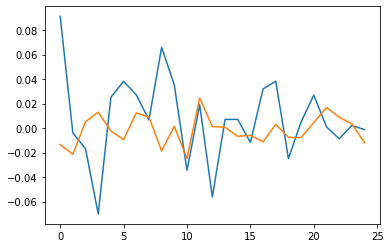

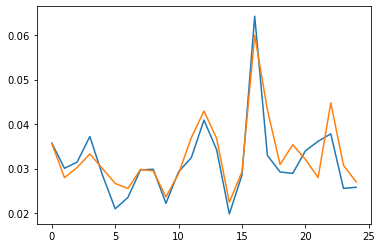

Wall time: 1min 42s


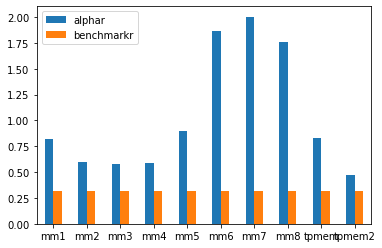

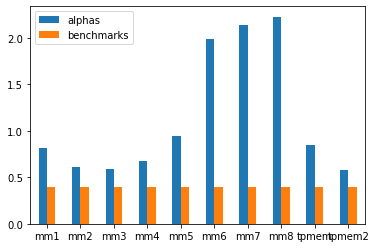

In [18]:
%%time
sig=get_signalact2(kalpha101(ohlcv_data),logrets(ohlcv_data),delay=1)

In [19]:
# ((-1 * ((low - close) * (open^5))) / ((low - high) * (close^5))) 
def kalpha54(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        kalpha.append(np.asarray(-((ohlcv_data[i]['Low']-ohlcv_data[i]['Close'])*(ohlcv_data[i]['Open']**5))/((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])*(ohlcv_data[i]['Close'])**5)))
    return getleneq(kalpha)[1]

In [20]:
kalpha54(ohlcv_data)

array([[ 0.33416439,  0.46651643,  0.40176514, ...,  0.75648938,
         0.72679024,  0.69911426],
       [ 0.63704545,  0.67924928,  0.51266225, ...,  0.15788286,
         0.14270319,  0.37140856],
       [ 0.4700908 ,  0.29031851,  0.40100491, ...,  0.77339136,
         0.65411422,  0.24393925],
       ...,
       [ 0.27087989, -0.        ,  0.46005503, ...,  0.73963903,
         0.72439728,  0.54392757],
       [ 0.14149039,  0.24329556,  0.7256105 , ...,  0.16524949,
         0.26383002,  0.33909758],
       [ 0.29212824,  0.4099867 ,  0.31760297, ...,  0.5848795 ,
         0.79185865,  0.15678747]])

1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


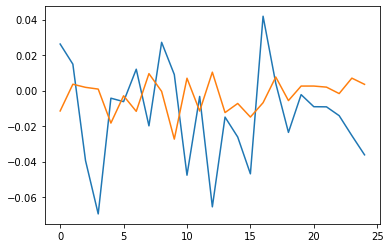

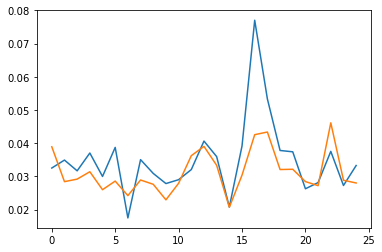

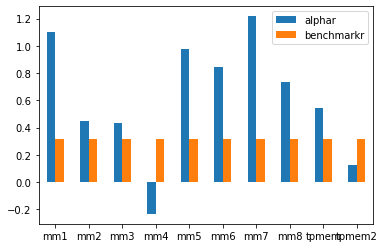

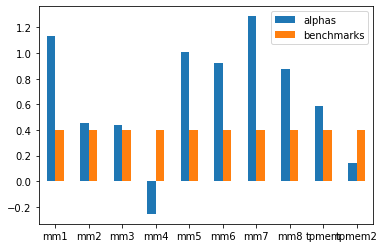

In [21]:
sig=get_signalact2(kalpha54(ohlcv_data),logrets(ohlcv_data), delay=1)

In [22]:
# (((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < (-1 * 0.05)) ? 1 : ((-1 * 1) * (close - delay(close, 1))))


def kalpha51(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        inner=(((ohlcv_data[i]['Close'].shift(20)-ohlcv_data[i]['Close'].shift(10))/10)-((ohlcv_data[i]['Close'].shift(10)-ohlcv_data[i]['Close'])/10))
        signals=np.where(inner<-0.05, -(ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].shift(1)), 0)
        kalpha.append(np.asarray(signals))
    return getleneq(kalpha)[1]
        

In [23]:
kalpha51(ohlcv_data)

array([[ 0.        ,  0.        ,  0.        , ..., -0.06999969,
         0.        , -0.47499847],
       [ 0.        ,  0.        ,  0.        , ...,  0.17000008,
        -0.22999954, -0.07000065],
       [ 0.        ,  0.        ,  0.        , ..., -0.33000183,
         0.        , -0.20000076],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.15000153,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.70999908,
        -1.26999664, -0.22000122],
       [ 0.        ,  0.        ,  0.        , ..., -0.01000214,
         0.        , -0.36999893]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


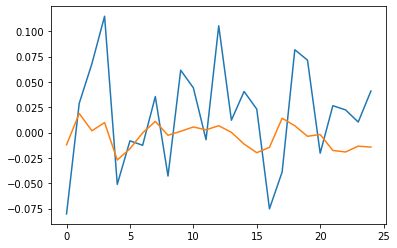

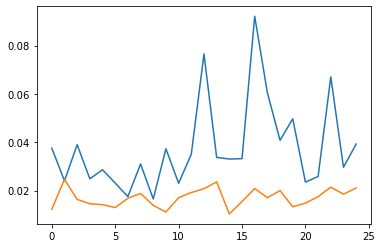

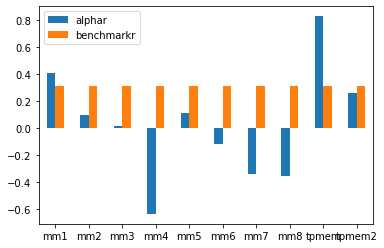

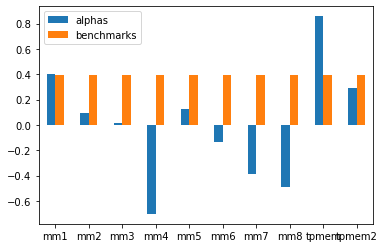

In [24]:
sig=get_signalact2(kalpha51(ohlcv_data),logrets(ohlcv_data), delay=1)

In [25]:
def cs_rank(df):
    return df.rank(pct=True)

In [26]:
def ts_rank(df, window):
    return (df.rolling(window).apply(lambda x: x.rank().iloc[-1]))

In [27]:
# ((((-1 * ts_min(low, 5)) + delay(ts_min(low, 5), 5))*rank(((sum(returns, 240)-sum(returns, 20)) / 220)))* ts_rank(volume, 5))


def kalpha52(ohlcv_data):
    kalpha=[]

    for i in range(len(ohlcv_data)):

        a=(ohlcv_data[i]['Low'].rolling(window=5).min()+((ohlcv_data[i]['Low']).rolling(window=5).min().shift(5)))
        b=ts_rank(((np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)).rolling(window=240).sum())-(np.log(ohlcv_data[i]['Close']/ohlcv_data[i]['Close'].shift(1)).rolling(window=20).sum()))/220,10)
        c=ts_rank(ohlcv_data[i]['Volume'], 5)
        kalpha.append(np.asarray((a*b)*c))
    return getleneq(kalpha)[1]
           
kalpha52(ohlcv_data)   

array([[          nan,           nan,           nan, ..., 1191.5999794 ,
        1303.60004425,  323.40001106],
       [          nan,           nan,           nan, ...,  419.35639631,
         888.59999657,  207.05999947],
       [          nan,           nan,           nan, ..., 3199.19998169,
        4240.39993286, 1056.59999847],
       ...,
       [          nan,           nan,           nan, ..., 1158.48001099,
         480.50001144,  477.20001221],
       [          nan,           nan,           nan, ..., 1929.12097839,
        5366.70009613, 1190.        ],
       [          nan,           nan,           nan, ..., 1513.15725863,
        3221.09996796, 1070.99998474]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


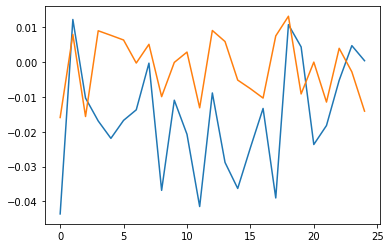

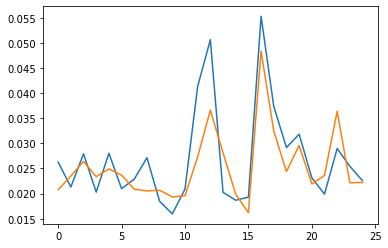

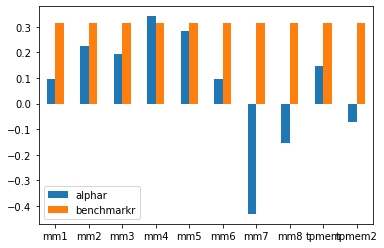

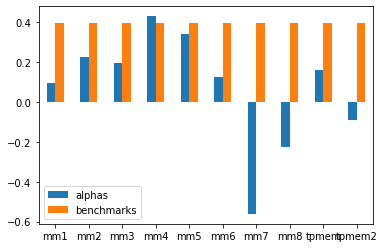

In [28]:
sig=get_signalact2(kalpha52(ohlcv_data),logrets(ohlcv_data), delay=1)

In [29]:
# (-1 * delta((((close - low) - (high - close)) / (close - low)), 9)) 

def kalpha53(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=(((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'])-(ohlcv_data[i]['High']-ohlcv_data[i]['Close']))/(ohlcv_data[i]['Close']-ohlcv_data[i]['Low']))
        kalpha.append(-np.asarray(a-a.shift(9)))
    return getleneq(kalpha)[1]

kalpha53(ohlcv_data)

array([[            nan,             nan,             nan, ...,
        -5.55556144e-01,  6.66636564e-02,  3.45301252e-01],
       [            nan,             nan,             nan, ...,
         4.71815386e+00,  6.20000477e+00,  1.50788150e+00],
       [            nan,             nan,             nan, ...,
        -3.08625566e+00,  2.48934766e-02,  3.03359361e+00],
       ...,
       [            nan,             nan,             nan, ...,
        -1.57218455e+01, -4.78495754e-03,  2.99996376e-02],
       [            nan,             nan,             nan, ...,
         4.15415471e+00,  2.86932597e+00,  1.91415752e+00],
       [            nan,             nan,             nan, ...,
        -2.29950611e-01, -4.82938146e-02,  5.14573418e+00]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract


1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\function_base.py:134: RuntimeWarning: overflow encountered in double_scalars
  delta = stop - start
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\users\neha\appdata\local\programs\python\python37\lib\site-packa

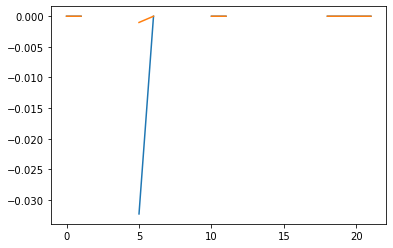

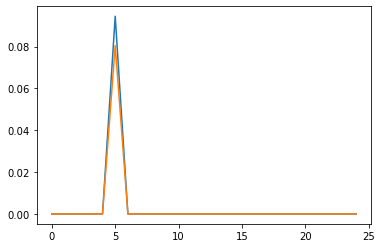

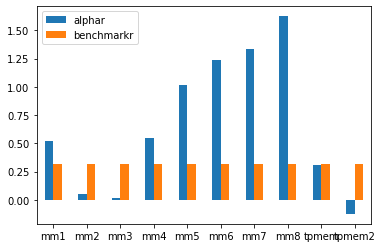

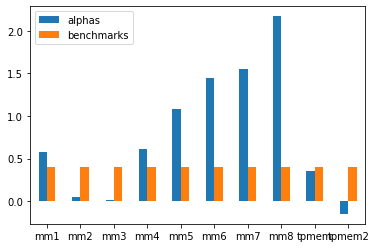

In [30]:
sig=get_signalact2(kalpha53(ohlcv_data),logrets(ohlcv_data), delay=1)

In [31]:
def corr(x, y, window):
    return x.rolling(window).corr(y)

In [32]:
# (-1 * correlation(rank(((close - ts_min(low, 12)) / (ts_max(high, 12) - ts_min(low, 12)))), rank(volume), 6))

def kalpha55(ohlcv_data):
    kalpha=[]
    
    for i in range(len(ohlcv_data)):
        a=ts_rank(((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'].rolling(window=12).min())/(ohlcv_data[i]['High'].rolling(window=12).max()-ohlcv_data[i]['Low'].rolling(window=12).min())),9)
        b=ts_rank((ohlcv_data[i]['Volume']),10) 
        
        kalpha.append(np.asarray(-(corr(a, b, 6))))
    return getleneq(kalpha)[1]


In [33]:
kalpha55(ohlcv_data)

array([[        nan,         nan,         nan, ..., -0.4780004 ,
        -0.92401683, -0.00807397],
       [        nan,         nan,         nan, ..., -0.26832816,
        -0.27814696,  0.5525872 ],
       [        nan,         nan,         nan, ..., -0.37274966,
        -0.54967336,  0.23285095],
       ...,
       [        nan,         nan,         nan, ..., -0.        ,
         0.4362973 ,  0.771261  ],
       [        nan,         nan,         nan, ..., -0.        ,
        -0.46947648,  0.18862902],
       [        nan,         nan,         nan, ..., -0.02002404,
        -0.17629017,  0.40586336]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


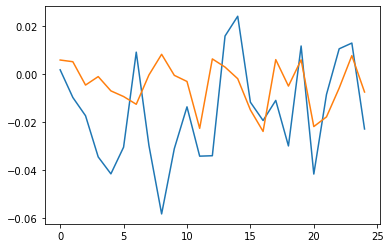

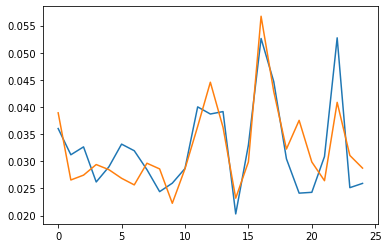

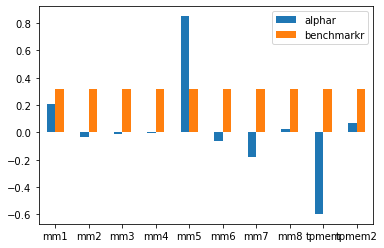

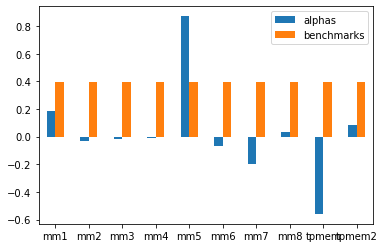

In [34]:
sig=get_signalact2(kalpha55(ohlcv_data),logrets(ohlcv_data), delay=1)

In [35]:
# (0 - (1 * (rank((sum(returns, 10) / sum(sum(returns, 2), 3))) * rank((returns * cap))))) 
def kalpha56(ohlcv_data):
    pass

In [36]:
import talib as ta

In [37]:
# (0 - (1 * ((close - vwap) / decay_linear(rank(ts_argmax(close, 30)), 2))))

def kalpha57(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[1])>0:
            a=ta.WMA(ts_rank((ohlcv_data[1]['Close'].rolling(window=30).apply(np.argmax).add(1)).fillna(0),10), timeperiod=2)
            b=ohlcv_data[i]['Close']-(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            c=-(b/a)
            d=np.nan_to_num(c, 0)
            kalpha.append(np.asarray(d))
    return getleneq(kalpha)[1]

kalpha57(ohlcv_data)        

array([[ 0.        ,  0.        ,  0.        , ...,  1.73691898,
         1.33598837,  0.9323067 ],
       [ 0.        ,  0.        ,  0.        , ...,  2.1153374 ,
         2.1653129 ,  1.75790836],
       [ 0.        ,  0.        ,  0.        , ..., -1.15123343,
        -2.09707513, -1.79711037],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.2565743 ,
        -1.54246252, -1.29475606],
       [ 0.        ,  0.        ,  0.        , ..., -0.87246868,
        -1.47814583, -1.29481095],
       [ 0.        ,  0.        ,  0.        , ..., -0.0635844 ,
        -0.99710471, -0.95143945]])

In [38]:
unique_elements, counts_elements = np.unique(kalpha57(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([-45.44694951, -42.68405148, -42.67259743, ...,  76.44511443,
        77.79555752,  84.4256268 ]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))


In [39]:
len(kalpha57(ohlcv_data))

26

In [40]:
len(logrets(ohlcv_data))

25

1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


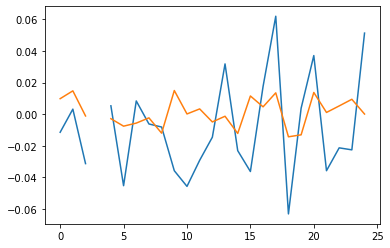

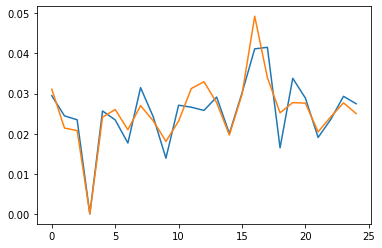

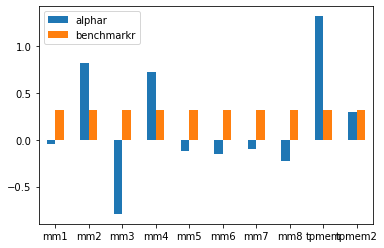

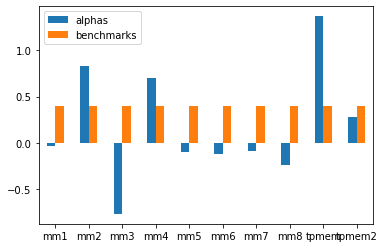

In [42]:
sig=get_signalact2_random(kalpha57(ohlcv_data)[1:],logrets(ohlcv_data), delay=1)

In [43]:
# (-1 * Ts_Rank(decay_linear(correlation(IndNeutralize(vwap, IndClass.sector), volume, 3.92795), 7.89291), 5.50322)) 

def kalpha58(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            a=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            b=corr(a-a.rolling(window=5).min(), ohlcv_data[i]['Volume'],4)
            c=ta.WMA(b, 8)
            d=ts_rank(c,5)
            e=np.nan_to_num(d, 0)
            kalpha.append(np.asarray(e))
    return getleneq(kalpha)[1]

kalpha58(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
unique_elements, counts_elements = np.unique(kalpha58(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([0., 1., 2., 3., 4., 5.]), array([22102,   826,   421,   411,   399,  1016], dtype=int64))


In [45]:
len(kalpha58(ohlcv_data))

25

In [46]:
len(logrets(ohlcv_data))

25

1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


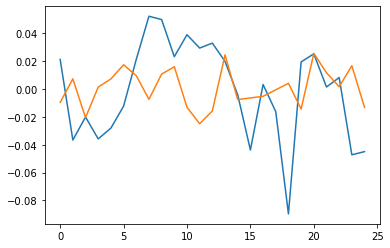

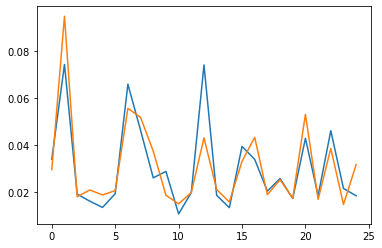

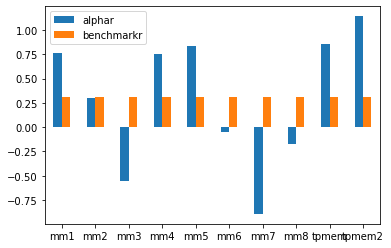

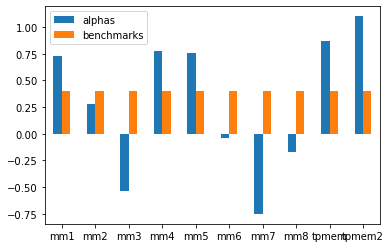

In [47]:
sig=get_signalact2_random(kalpha58(ohlcv_data),logrets(ohlcv_data), delay=1)

In [48]:
# (-1 * Ts_Rank(decay_linear(correlation(IndNeutralize(((vwap * 0.728317) + (vwap * (1 - 0.728317))), IndClass.industry), volume, 4.25197), 16.2289), 8.19648))

def kalpha59(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.728317
            c=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            d=corr((c*w+(c*(1-w)))-((c*w+(c*(1-w))).rolling(window=5).min()), ohlcv_data[i]['Volume'], 4)
            e=ta.WMA(d,16)
            f=(ts_rank(e, 8))*(-1)
            g=np.nan_to_num(f, 0)
            kalpha.append(np.asarray(g))
    return getleneq(kalpha)[1]

kalpha59(ohlcv_data)            

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
unique_elements, counts_elements = np.unique(kalpha59(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([-8., -7., -6., -5., -4., -3., -2., -1.,  0.]), array([  673,   254,   264,   249,   241,   256,   288,   579, 22371],
      dtype=int64))


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


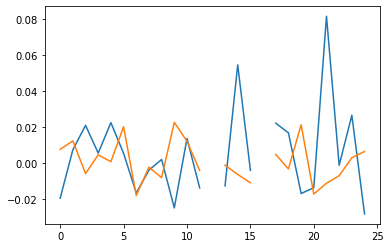

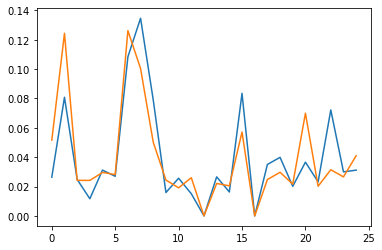

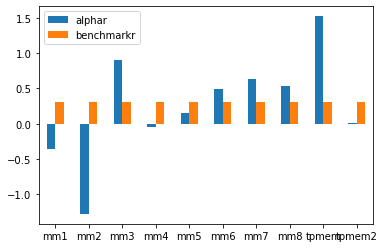

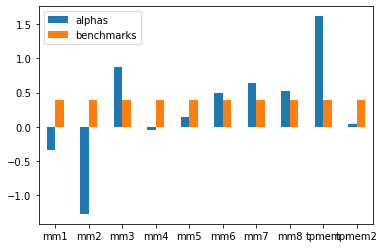

In [50]:
sig=get_signalact2_random(kalpha59(ohlcv_data),logrets(ohlcv_data), delay=1)

In [51]:
def scale(df):
   
    return df.div(df.abs().sum(), axis=0)

In [52]:
 # (0 - (1 * ((2 * scale(rank(((((close - low) - (high - close)) / (high - low)) * volume)))) - scale(rank(ts_argmax(close, 10))))))

def kalpha60(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        a=(2*scale(ts_rank(((((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'])-(ohlcv_data[i]['High']-ohlcv_data[i]['Close']))/(ohlcv_data[i]['High']-ohlcv_data[i]['Low']))*ohlcv_data[i]['Volume']),10)))
        b=scale(ts_rank(ohlcv_data[i]['Close'].rolling(window=10).apply(np.argmax).add(1),10))
        kalpha.append(np.asarray(b-a))
    return getleneq(kalpha)[1]



In [53]:
kalpha60(ohlcv_data)

array([[        nan,         nan,         nan, ..., -0.00277773,
        -0.00335688, -0.0023604 ],
       [        nan,         nan,         nan, ..., -0.00052797,
        -0.00052797, -0.00237845],
       [        nan,         nan,         nan, ..., -0.00309784,
        -0.00222201, -0.00160244],
       ...,
       [        nan,         nan,         nan, ..., -0.0012126 ,
        -0.00115887, -0.00058109],
       [        nan,         nan,         nan, ..., -0.00056958,
        -0.00077923, -0.00249723],
       [        nan,         nan,         nan, ..., -0.00147089,
        -0.00314993, -0.00078783]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


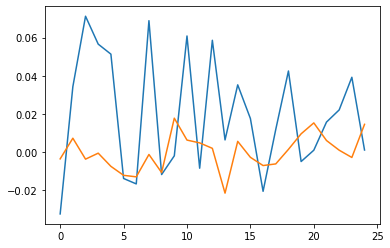

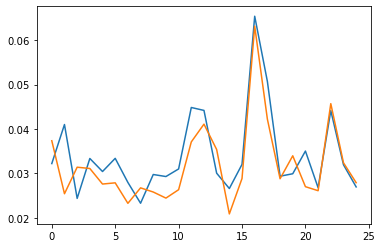

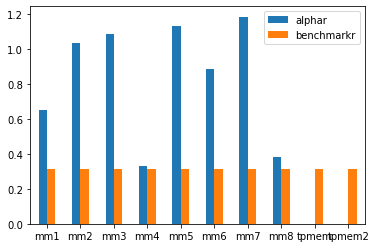

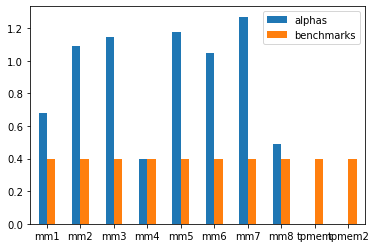

In [54]:
sig=get_signalact2(kalpha60(ohlcv_data),logrets(ohlcv_data), delay=1)

In [147]:
# (rank((vwap - ts_min(vwap, 16.1219))) < rank(correlation(vwap, adv180, 17.9282))) 

# def kalpha61(ohlcv_data):
#     kalpha=[]
#     for i in range(len(ohlcv_data)):
#         if len(ohlcv_data[i])>0:
#             s=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
#             t=ts_rank((s-s.rolling(window=16).min()),10)
#             u=ts_rank(corr(s, ohlcv_data[i]['Volume'].rolling(window=180).mean(),18),10)
#             v=t<u
#             x=np.nan_to_num(v,0)
#             kalpha.append(np.asarray(x))
#     return getleneq(kalpha61(ohlcv_data))

# kalpha61(ohlcv_data)

In [146]:
# sig=get_signalact2(kalpha61(ohlcv_data),logrets(ohlcv_data), delay=1)

In [55]:
# ((rank(correlation(vwap, sum(adv20, 22.4101), 9.91009)) < rank(((rank(open) + rank(open)) < (rank(((high + low) / 2)) + rank(high))))) * -1) 

def kalpha62(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            u=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            a=ohlcv_data[i]['Volume'].rolling(window=20).mean()
            b=ts_rank(corr(u, a.rolling(window=22).sum(), 10),10)
            c=ts_rank(((ts_rank((ohlcv_data[i]['Open'])*(2),10))<(ts_rank(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2),10)+ts_rank(ohlcv_data[i]['High'],10))),10)
            i=(b<c)*(-1)
            h=np.nan_to_num(i, 0)
            kalpha.append(np.asarray(h))
    return getleneq(kalpha)[1]

kalpha62(ohlcv_data)

array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1,  0],
       ...,
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [56]:
unique_elements, counts_elements = np.unique(kalpha62(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([-1,  0]), array([11544, 13631], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


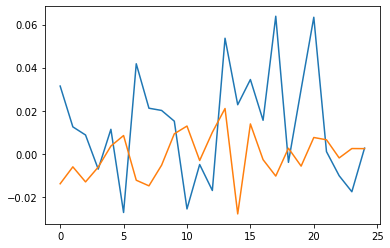

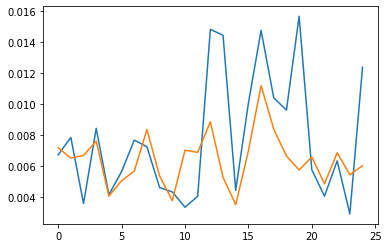

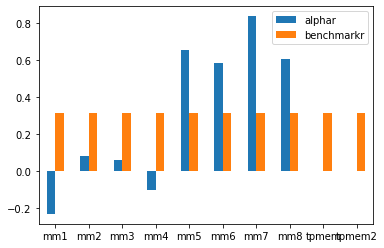

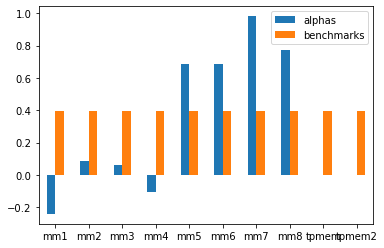

In [57]:
sig=get_signalact2(kalpha62(ohlcv_data),logrets(ohlcv_data), delay=1)

In [58]:
# ((rank(decay_linear(delta(IndNeutralize(close, IndClass.industry), 2.25164), 8.22237)) - 
#   rank(decay_linear(correlation(((vwap * 0.318108) + (open * (1 - 0.318108))), sum(adv180, 37.2467), 13.557), 12.2883))) * -1)

def kalpha63(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.318108
            x=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            q=(ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].rolling(window=5).min())-((ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].rolling(window=5).min()).shift(2))
            e=ts_rank(ta.WMA(q, 8),10)
            p=ohlcv_data[i]['Volume'].rolling(window=180).mean()
            g=corr((x*(w)+ohlcv_data[i]['Open']*(1-w)), p.rolling(window=37).sum(),13)
            h=ts_rank(ta.WMA(g, 12),10)
            f=(e-h)*(-1)
            r=np.nan_to_num(f)
            kalpha.append(np.asarray(r))
    return getleneq(kalpha)[1]

kalpha63(ohlcv_data)

array([[ 0.,  0.,  0., ...,  5.,  3., -0.],
       [ 0.,  0.,  0., ..., -4., -7., -8.],
       [ 0.,  0.,  0., ...,  5.,  2., -0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -0., -0.],
       [ 0.,  0.,  0., ...,  4.,  3., -0.],
       [ 0.,  0.,  0., ...,  6.,  1., -0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


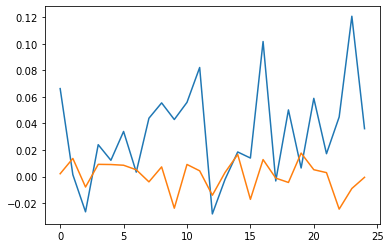

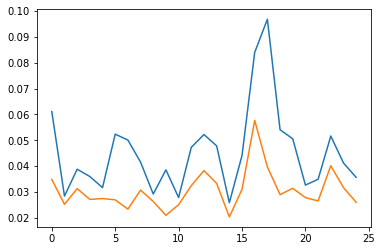

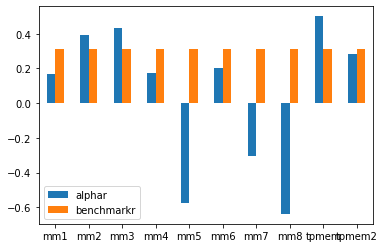

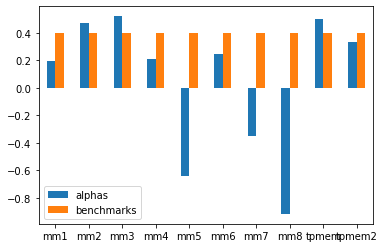

In [59]:
sig=get_signalact2(kalpha63(ohlcv_data),logrets(ohlcv_data), delay=1)

In [60]:
# ((rank(correlation(sum(((open * 0.178404) + (low * (1 - 0.178404))), 12.7054), sum(adv120, 12.7054), 16.6208)) 
# < rank(delta(((((high + low) / 2) * 0.178404) + (vwap * (1 - 0.178404))), 3.69741))) * -1)

def kalpha64(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.178404
            a=ohlcv_data[i]['Volume'].rolling(window=120).mean()
            p=ts_rank(corr((ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['Low']*(1-w)).rolling(window=12).sum(),a.rolling(window=12).sum(),16),10)
            m=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            q=ts_rank(((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)*(w))+m*(1-w))-(((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)*(w))+m*(1-w)).shift(4)),10)
            u=(p<q)*(-1)
            b=np.nan_to_num(u)
            kalpha.append(np.asarray(b))
    return getleneq(kalpha)[1]

kalpha64(ohlcv_data)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [61]:
unique_elements, counts_elements = np.unique(kalpha64(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([-1,  0]), array([ 9247, 15928], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


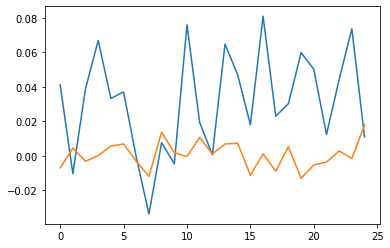

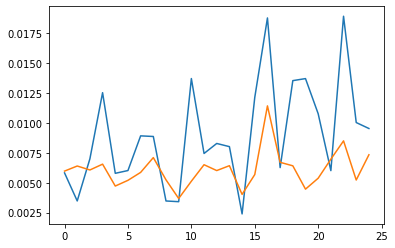

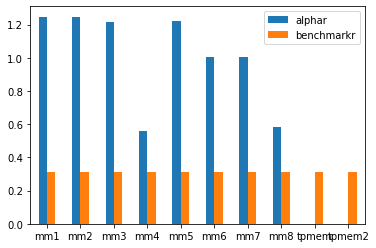

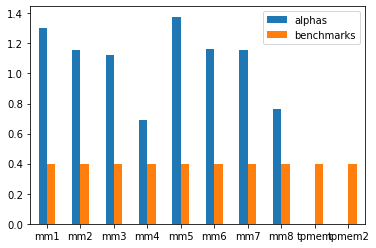

In [62]:
sig=get_signalact2(kalpha64(ohlcv_data),logrets(ohlcv_data), delay=1)

In [63]:
# ((rank(correlation(((open * 0.00817205) + (vwap * (1 - 0.00817205))), sum(adv60, 8.6911), 6.40374)) 
# < rank((open - ts_min(open, 13.635)))) * -1)

def kalpha65(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.00817205
            k=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            m=ohlcv_data[i]['Volume'].rolling(window=60).mean()
            j=ts_rank(corr((ohlcv_data[i]['Open']*(w)+(k*(1-w))),m.rolling(window=9).sum(),6),10)
            l=ts_rank((ohlcv_data[i]['Open']-ohlcv_data[i]['Open'].rolling(window=13).min()),10)
            d=(j<l)*(-1)
            y=np.nan_to_num(d, 0)
            kalpha.append(np.asarray(y))
    return getleneq(kalpha)[1]

kalpha65(ohlcv_data)

array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0, -1, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0, -1, -1]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


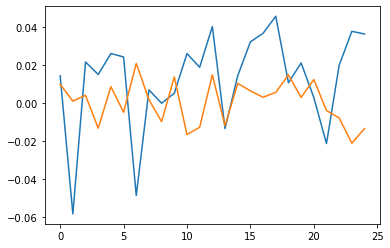

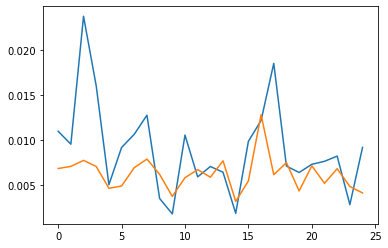

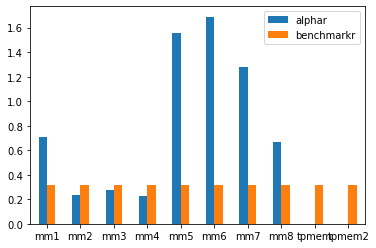

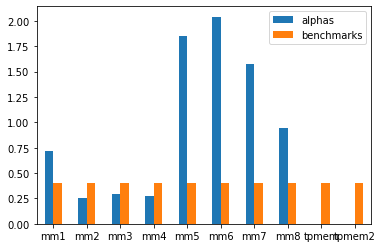

In [64]:
sig=get_signalact2(kalpha65(ohlcv_data),logrets(ohlcv_data), delay=1)

In [65]:
# ((rank(decay_linear(delta(vwap, 3.51013), 7.23052)) + 
# Ts_Rank(decay_linear(((((low * 0.96633) + (low * (1 - 0.96633))) - vwap) / (open - ((high + low) / 2))), 11.4157), 6.72611)) * -1) 

def kalpha66(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.96633
            e=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            t=ts_rank(ta.WMA((e-e.shift(3)),7),10)
            s=ts_rank(ta.WMA((((ohlcv_data[i]['Low']*(w))+(ohlcv_data[i]['Low']*(1-w)))/(ohlcv_data[i]['Open']-((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2))),11),6)
            h=(t-s)*(-1)
            o=np.nan_to_num(h)
            kalpha.append(np.asarray(o))
    return getleneq(kalpha)[1]
                
kalpha66(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


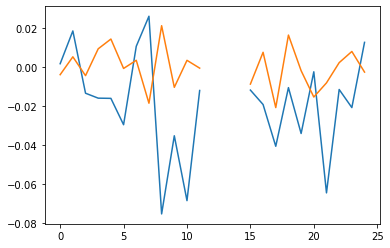

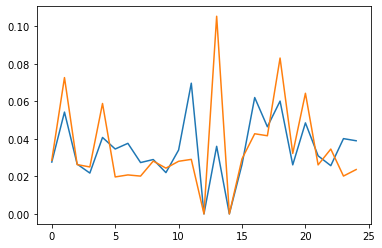

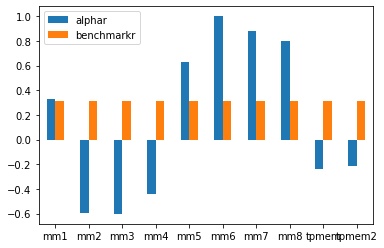

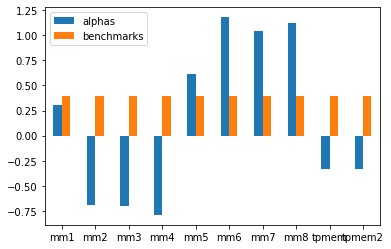

In [66]:
sig=get_signalact2(kalpha66(ohlcv_data),logrets(ohlcv_data), delay=1)

In [67]:
#  ((rank((high - ts_min(high, 2.14593)))^
#    rank(correlation(IndNeutralize(vwap, IndClass.sector), IndNeutralize(adv20, IndClass.subindustry), 6.02936))) * -1) 

def kalpha67(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            t=ts_rank((ohlcv_data[i]['High']-ohlcv_data[i]['High'].rolling(window=2).min()),10)
            k=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            m=ohlcv_data[i]['Volume'].rolling(window=20).mean()
            n=ts_rank(corr((k-k.rolling(window=5).min()),m-m.rolling(window=5).min(),6),10)
            o=(t**n)*(-1)
            u=np.nan_to_num(o)
            kalpha.append(np.asarray(u))
    return getleneq(kalpha)[1]

kalpha67(ohlcv_data)      

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ..., -3.000e+00, -7.290e+02,
        -4.096e+03],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ..., -3.500e+00, -1.000e+01,
        -6.561e+03]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


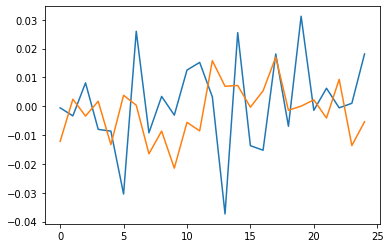

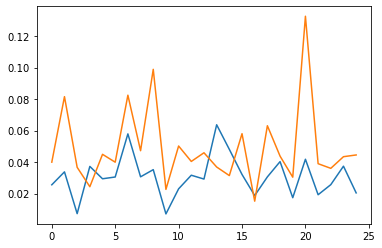

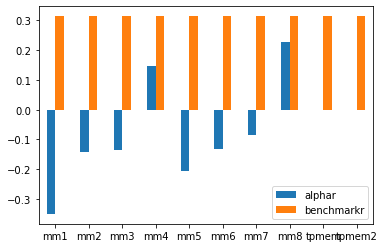

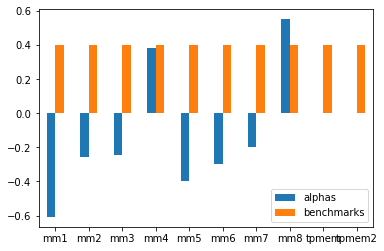

In [68]:
sig=get_signalact2(kalpha67(ohlcv_data),logrets(ohlcv_data), delay=1)

In [69]:
# ((Ts_Rank(correlation(rank(high), rank(adv15), 8.91644), 13.9333) < 
# rank(delta(((close * 0.518371) + (low * (1 - 0.518371))), 1.06157))) * -1) 
    
def kalpha68(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.518371
            c=ts_rank(corr(ts_rank(ohlcv_data[i]['High'],10),ts_rank(ohlcv_data[i]['Volume'].rolling(window=15).mean(),10),8),14)
            f=ts_rank(((ohlcv_data[i]['Close']*(w)+(ohlcv_data[i]['Low']*(1-w)))-((ohlcv_data[i]['Close']*(w)+(ohlcv_data[i]['Low']*(1-w))).shift(1))),10)
            d=(c<f)*(-1)
            e=np.nan_to_num(d, 0)
            kalpha.append(np.asarray(e))
    return getleneq(kalpha)[1]
        
kalpha68(ohlcv_data)

array([[ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1]])

1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


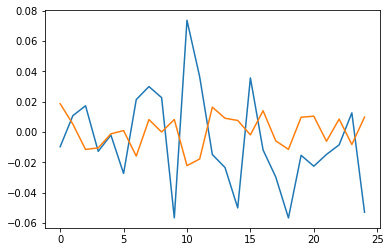

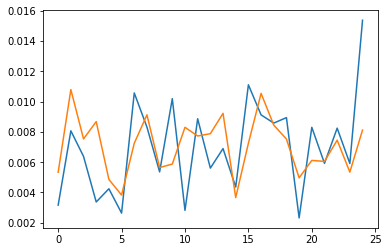

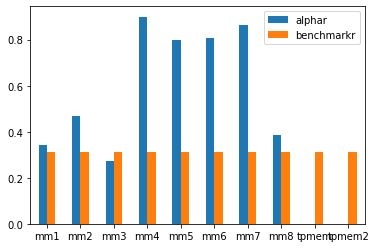

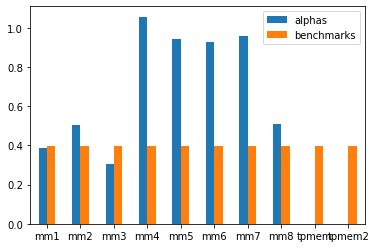

In [70]:
sig=get_signalact2(kalpha68(ohlcv_data),logrets(ohlcv_data), delay=1)

In [71]:
# ((rank(ts_max(delta(IndNeutralize(vwap, IndClass.industry), 2.72412), 4.79344))
#   ^Ts_Rank(correlation(((close * 0.490655) + (vwap * (1 - 0.490655))), adv20, 4.92416), 9.0615)) * -1) 

def kalpha69(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.490655
            g=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            m=ts_rank(((g-g.rolling(window=5).min()-(g-g.rolling(window=5).min()).shift(2)).rolling(window=5).max()),10)
            n=ts_rank(corr(((ohlcv_data[i]['Close']*w)+(g*(1-w))),ohlcv_data[i]['Volume'].rolling(window=20).mean(),4),9)
            y=(m**n)*(-1)
            z=np.nan_to_num(y, 0)
            kalpha.append(np.asarray(z))
    return getleneq(kalpha)[1]
        
kalpha69(ohlcv_data)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.50000000e+00, -8.37339379e+05, -9.15062500e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.66375000e+02, -3.02500000e+01, -5.03284375e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.70000000e+01, -1.00000000e+00, -2.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -9.02500000e+01, -5.90490000e+04, -6.14125000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.90625000e+01, -1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.00000000e+00, -1.00000000e+00, -1.60000000e+01]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


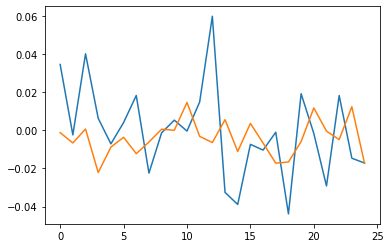

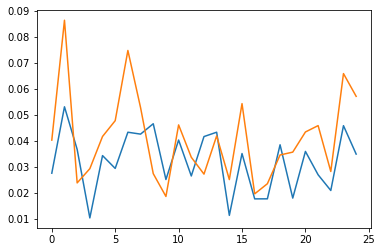

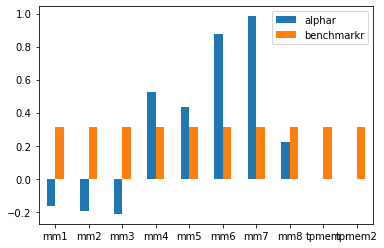

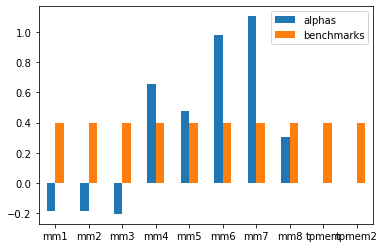

In [72]:
sig=get_signalact2(kalpha69(ohlcv_data),logrets(ohlcv_data), delay=1)

In [73]:
# ((rank(delta(vwap, 1.29456))
#   ^Ts_Rank(correlation(IndNeutralize(close, IndClass.industry), adv50, 17.8256), 17.9171)) * -1) 

def kalpha70(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            s=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            n=ts_rank((s-s.shift(1)),10)
            k=ts_rank(corr((ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].rolling(window=5).min()),ohlcv_data[i]['Volume'].rolling(window=50).mean(),18),18)
            l=(n**k)*(-1)
            q=np.nan_to_num(l)
            kalpha.append(np.asarray(q))
    return getleneq(kalpha)[1]
        
kalpha70(ohlcv_data)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.00000000e+00, -1.77147000e+05, -1.00000000e+15],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.09600000e+03, -2.04800000e+03, -1.00000000e+12],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -4.66560000e+04, -1.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.62797056e+08, -1.17649000e+05, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -1.07374182e+09, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -6.56100000e+03, -9.00000000e+00]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


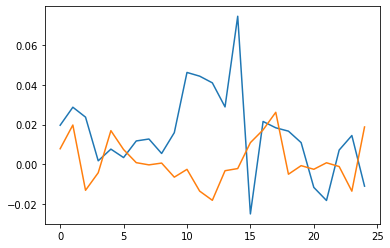

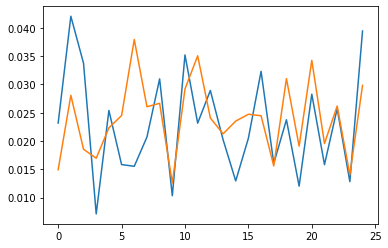

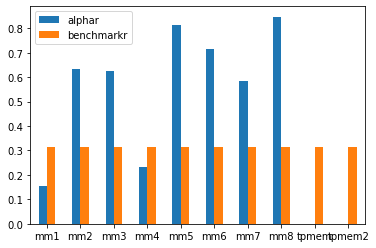

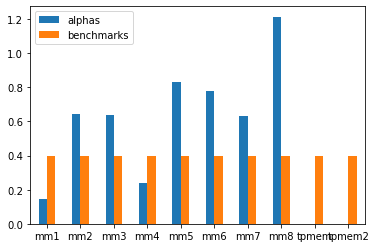

In [74]:
sig=get_signalact2(kalpha70(ohlcv_data),logrets(ohlcv_data), delay=1)

In [75]:
# max(Ts_Rank(decay_linear(correlation(Ts_Rank(close, 3.43976), Ts_Rank(adv180, 12.0647), 18.0175), 4.20501), 15.6948),
#     Ts_Rank(decay_linear((rank(((low + open) - (vwap + vwap)))^2), 16.4662), 4.4388)) 

def kalpha71(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            y=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            a=corr(ts_rank(ohlcv_data[i]['Close'],3), ts_rank(ohlcv_data[i]['Volume'].rolling(window=180).mean(),12),18)
            b=ts_rank((ta.WMA(a,4)),16)
            c=ts_rank(ta.WMA((ts_rank(((ohlcv_data[i]['Low']+ohlcv_data[i]['Open'])-(y*(2))),10)*(2)),16),10)
            d=np.maximum(b,c)
            e=np.nan_to_num(d, 0)
            kalpha.append(np.asarray(e))
    return getleneq(kalpha)[1]

kalpha71(ohlcv_data)

array([[ 0.,  0.,  0., ..., 16., 16., 16.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib

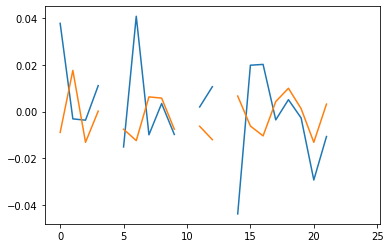

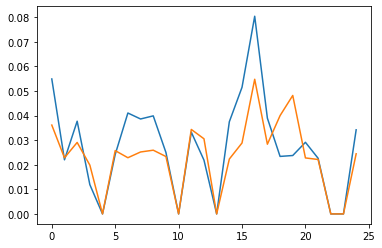

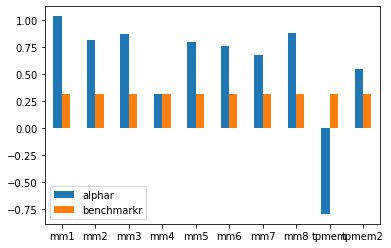

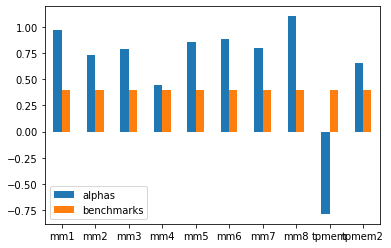

In [76]:
sig=get_signalact2(kalpha71(ohlcv_data),logrets(ohlcv_data), delay=1)

In [77]:
# (rank(decay_linear(correlation(((high + low) / 2), adv40, 8.93345), 10.1519)) / 
# rank(decay_linear(correlation(Ts_Rank(vwap, 3.72469), Ts_Rank(volume, 18.5188), 6.86671), 2.95011)))

def kalpha72(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            u=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            v=ts_rank(ta.WMA(corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2),ohlcv_data[i]['Volume'].rolling(window=40).mean(),9),10),10)
            y=ts_rank(ta.WMA(corr(ts_rank(u,4),ts_rank(ohlcv_data[i]['Volume'],18),7),3),10)
            z=v/y
            aa=np.nan_to_num(z,0)
            kalpha.append(np.asarray(aa))
    return getleneq(kalpha)[1]

kalpha72(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
unique_elements, counts_elements = np.unique(kalpha72(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([ 0.        ,  0.1       ,  1.        ,  1.11111111,  1.25      ,
        1.42857143,  1.66666667,  2.5       ,  3.33333333, 10.        ]), array([25160,     1,     4,     2,     3,     1,     1,     1,     1,
           1], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib

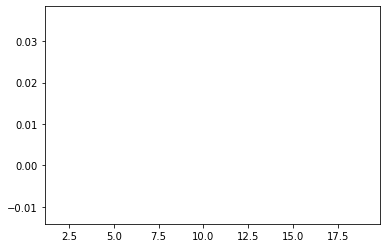

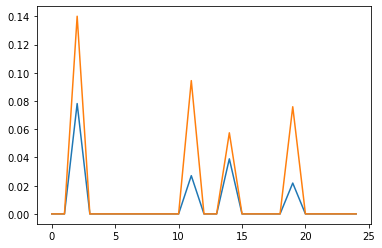

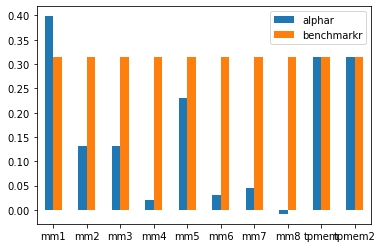

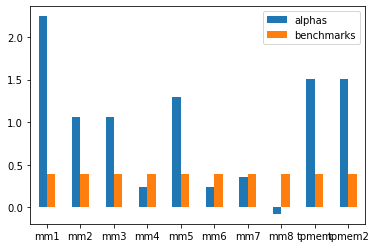

In [79]:
sig=get_signalact2(kalpha72(ohlcv_data),logrets(ohlcv_data), delay=1)

In [80]:
#  (max(rank(decay_linear(delta(vwap, 4.72775), 2.91864)), 
# Ts_Rank(decay_linear(((delta(((open * 0.147155) + (low * (1 - 0.147155))), 2.03608) / ((open * 0.147155) + (low * (1 - 0.147155)))) * -1), 3.33829), 16.7411)) * -1) 


def kalpha73(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.147155
            t=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            f=ts_rank(ta.WMA((t-t.shift(5)),2),10)
            e=ts_rank(ta.WMA((((ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['Low']*(1-w))-((ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['Low']*(1-w)).shift(2))/(ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['Low']*(1-w)))*(-1)),3),16)
            k=(np.maximum(f, e))*(-1)
            l=np.nan_to_num(k, 0)
            kalpha.append(np.asarray(l))
    return getleneq(kalpha)[1]
        
        
kalpha73(ohlcv_data)

array([[  0.,   0.,   0., ..., -16., -14., -12.],
       [  0.,   0.,   0., ..., -16., -15., -14.],
       [  0.,   0.,   0., ..., -16., -14., -12.],
       ...,
       [  0.,   0.,   0., ..., -16., -14., -12.],
       [  0.,   0.,   0., ..., -16., -15., -14.],
       [  0.,   0.,   0., ..., -16., -15., -13.]])

In [81]:
kalpha73(ohlcv_data)[35:]

array([], shape=(0, 1007), dtype=float64)

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


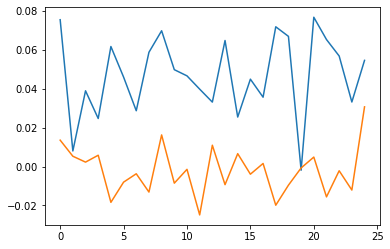

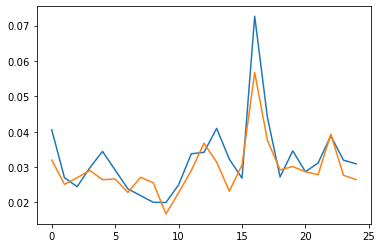

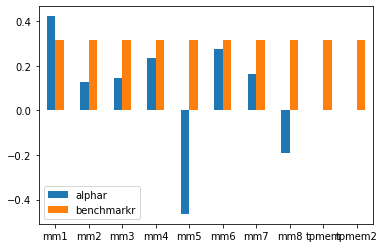

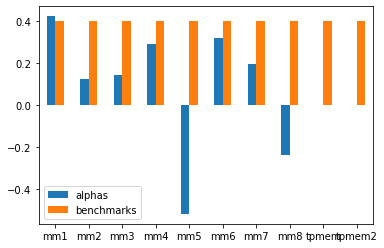

In [82]:
sig=get_signalact2(kalpha73(ohlcv_data),logrets(ohlcv_data), delay=1)

In [83]:
# ((rank(correlation(close, sum(adv30, 37.4843), 15.1365)) < 
# rank(correlation(rank(((high * 0.0261661) + (vwap * (1 - 0.0261661)))), rank(volume), 11.4791))) * -1) 

def kalpha74(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.0261661
            a=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            b=ohlcv_data[i]['Volume'].rolling(window=30).mean()
            c=ts_rank(corr(ohlcv_data[i]['Close'], b.rolling(window=37).sum(),15),10)
            d=ts_rank(corr(ts_rank((ohlcv_data[i]['High']*(w)+(a*(1-w))),10), ts_rank(ohlcv_data[i]['Volume'],10),12),10)
            e=(c<d)*(-1)
            f=np.nan_to_num(e,0)
            kalpha.append(np.asarray(f))
    return getleneq(kalpha)[1]

kalpha74(ohlcv_data)

array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


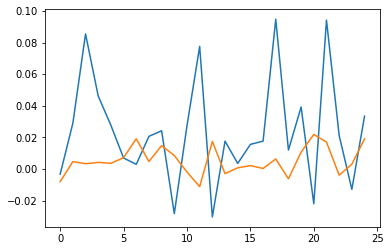

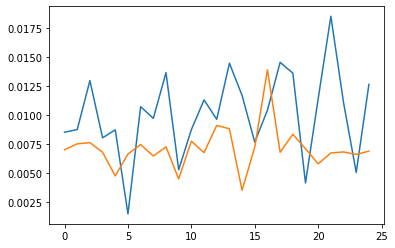

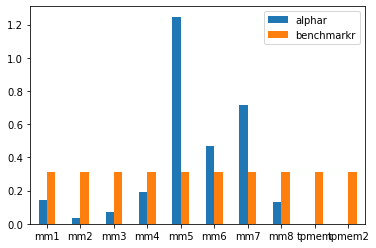

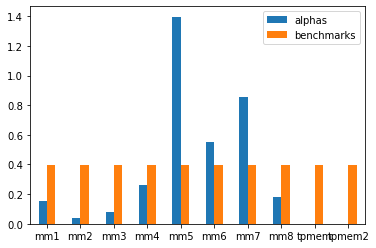

In [84]:
sig=get_signalact2(kalpha74(ohlcv_data),logrets(ohlcv_data), delay=1)

In [85]:
# (rank(correlation(vwap, volume, 4.24304)) < rank(correlation(rank(low), rank(adv50), 12.4413)))

def kalpha75(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            e=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            cc=ts_rank(corr(e, ohlcv_data[i]['Volume'],4),10)
            cb=ts_rank(corr(ts_rank(ohlcv_data[i]['Low'],10), ts_rank(ohlcv_data[i]['Volume'].rolling(window=50).mean(),10),12),10)
            ca=cc<cb
            cd=np.nan_to_num(ca,0)
            kalpha.append(np.asarray(cd))
    return getleneq(kalpha)[1]

kalpha75(ohlcv_data)

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

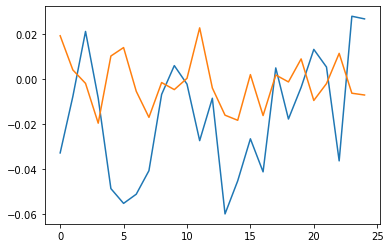

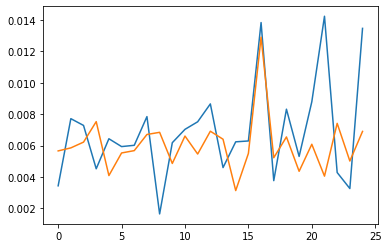

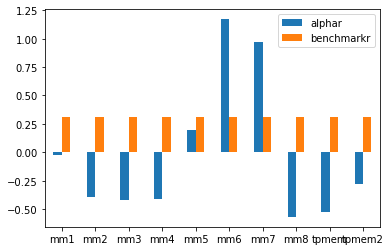

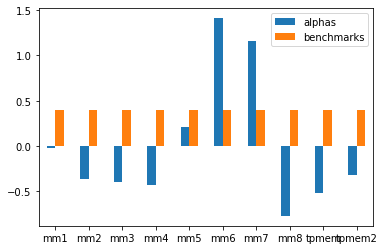

In [86]:
sig=get_signalact2(kalpha75(ohlcv_data),logrets(ohlcv_data), delay=1)

In [87]:
# (max(rank(decay_linear(delta(vwap, 1.24383), 11.8259)), 
# Ts_Rank(decay_linear(Ts_Rank(correlation(IndNeutralize(low, IndClass.sector), adv81, 8.14941), 19.569), 17.1543), 19.383)) * -1) 

def kalpha76(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            vt=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            av=ts_rank(ta.WMA((vt-vt.shift(1)),12),10)
            bv=ts_rank(ta.WMA(ts_rank(corr((ohlcv_data[i]['Low']-ohlcv_data[i]['Low'].rolling(window=5).min()),ohlcv_data[i]['Volume'].rolling(window=81).mean(),8),20),17),19)
            cv=(np.maximum(av,bv))*(-1)
            dv=np.nan_to_num(cv,0)
            kalpha.append(np.asarray(dv))
    return getleneq(kalpha)[1]

kalpha76(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib

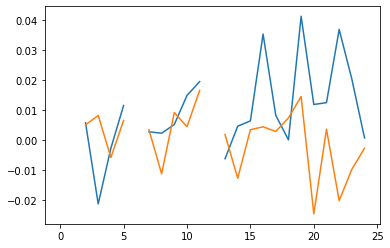

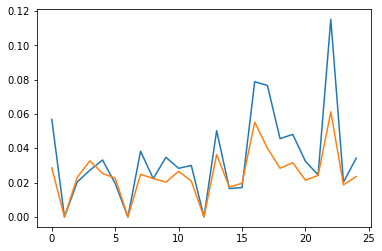

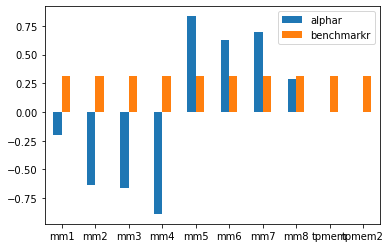

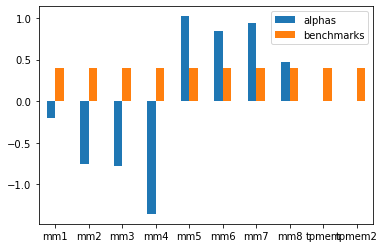

In [88]:
sig=get_signalact2(kalpha76(ohlcv_data),logrets(ohlcv_data), delay=1)

In [89]:
# min(rank(decay_linear(((((high + low) / 2) + high) - (vwap + high)), 20.0451)), 
# rank(decay_linear(correlation(((high + low) / 2), adv40, 3.1614), 5.64125))) 

def kalpha77(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ol=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            ao=ts_rank(ta.WMA(((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+ohlcv_data[i]['High'])-(ol+ohlcv_data[i]['High'])),20),10)
            bo=ts_rank(ta.WMA(corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2), ohlcv_data[i]['Volume'].rolling(window=40).mean(),3),6),10)
            co=np.minimum(ao,bo)
            do=np.nan_to_num(co,0)
            kalpha.append(np.asarray(do))
    return getleneq(kalpha)[1]
kalpha77(ohlcv_data)

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [99]:
unique_elements, counts_elements = np.unique(kalpha77(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), array([ 1375, 11730,  1657,  1520,  1418,  1280,  1321,  1070,  1107,
         950,  1747], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


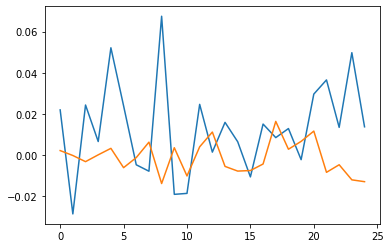

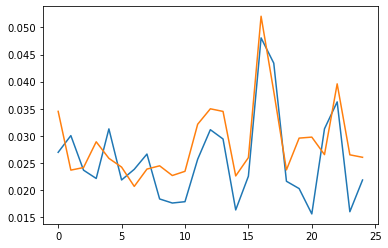

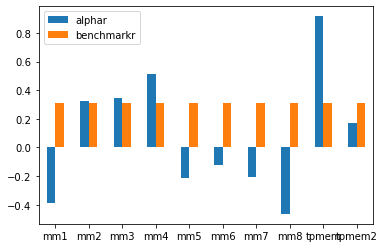

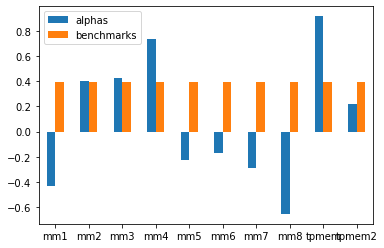

In [90]:
sig=get_signalact2(kalpha77(ohlcv_data),logrets(ohlcv_data), delay=1)

In [91]:
# (rank(correlation(sum(((low * 0.352233) + (vwap * (1 - 0.352233))), 19.7428), sum(adv40, 19.7428), 6.83313))
#  ^rank(correlation(rank(vwap), rank(volume), 5.77492)))

def kalpha78(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.352233
            ae=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            be=ohlcv_data[i]['Volume'].rolling(window=40).mean()
            ce=ts_rank(corr((ohlcv_data[i]['Low']*(w)+(ae*(1-w))).rolling(window=20).sum(),be.rolling(window=20).sum(),7),10)
            de=ts_rank(corr(ts_rank(ae,10), ts_rank(ohlcv_data[i]['Volume'],10),6),10)
            ee=ce**de
            fe=np.nan_to_num(ee,0)
            kalpha.append(np.asarray(ee))
    return getleneq(kalpha)[1]
        
kalpha78(ohlcv_data)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+05, 3.16227766e+04, 1.00000000e+05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.02400000e+03, 1.90472322e+04, 9.26819000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.62144000e+05, 4.11420216e+06, 2.09715200e+06]])

In [92]:
kalpha78(ohlcv_data)[:7]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+05, 3.16227766e+04, 1.00000000e+05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.27680000e+04, 1.02400000e+03, 1.00000000e+00]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


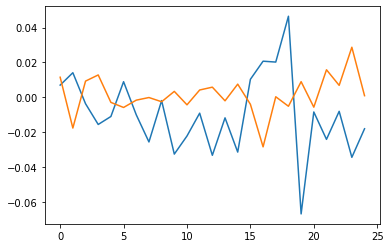

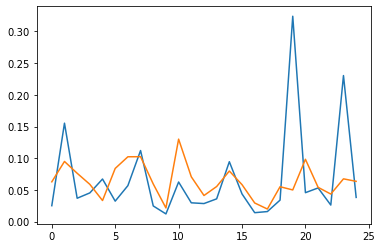

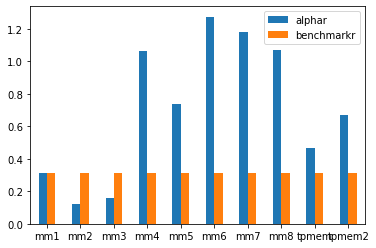

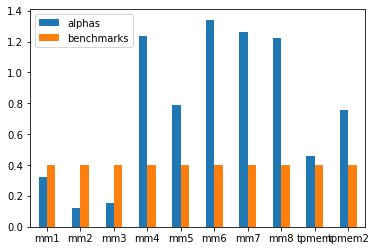

In [93]:
sig=get_signalact2(kalpha78(ohlcv_data),logrets(ohlcv_data), delay=1)

In [94]:
# (rank(delta(IndNeutralize(((close * 0.60733) + (open * (1 - 0.60733))), IndClass.sector), 1.23438))
#  < rank(correlation(Ts_Rank(vwap, 3.60973), Ts_Rank(adv150, 9.18637), 14.6644)))


def kalpha79(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.60733
            ad=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bd=(ohlcv_data[i]['Close']*(w)+ohlcv_data[i]['Open']*(1-w)-((ohlcv_data[i]['Close']*(w)+ohlcv_data[i]['Open']*(1-w)).rolling(window=5).min()))
            cd=ts_rank((bd-bd.shift(1)),10)
            dd=ts_rank(corr(ts_rank(ad,4),ts_rank(ohlcv_data[i]['Volume'].rolling(window=150).mean(),9),15),10)
            ed=cd<dd
            fd=np.nan_to_num(ed,0)
            kalpha.append(np.asarray(fd))
    return getleneq(kalpha)[1]
    

kalpha79(ohlcv_data)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [95]:
kalpha79(ohlcv_data)[10:20]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [100]:
unique_elements, counts_elements = np.unique(kalpha79(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([False,  True]), array([24502,   673], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

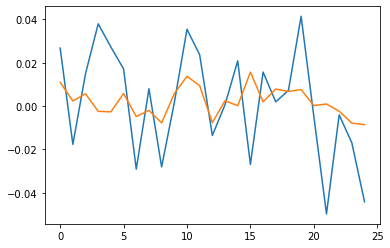

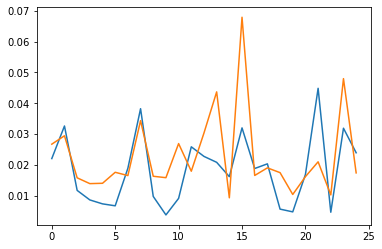

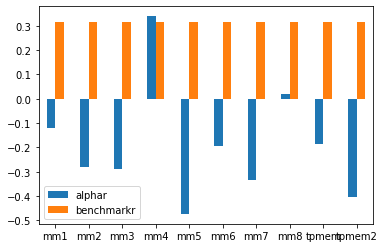

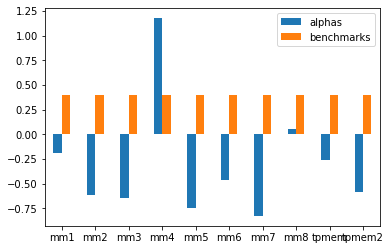

In [96]:
sig=get_signalact2(kalpha79(ohlcv_data),logrets(ohlcv_data), delay=1)

In [97]:
# ((rank(Sign(delta(IndNeutralize(((open * 0.868128) + (high * (1 - 0.868128))), IndClass.industry), 4.04545)))
#   ^Ts_Rank(correlation(high, adv10, 5.11456), 5.53756)) * -1)

def kalpha80(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.868128
            ae=(ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['High']*(1-w))-((ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['High']*(1-w)).rolling(window=5).min())
            aa=ae-ae.shift(4)
            be=ts_rank(np.sign(aa),10)
            ce=ts_rank(corr(ohlcv_data[i]['High'], ohlcv_data[i]['Volume'].rolling(window=10).mean(),5),6)
            de=(be**ce)*(-1)
            fe=np.nan_to_num(de,0)
            kalpha.append(np.asarray(fe))
    return getleneq(kalpha)[1]

kalpha80(ohlcv_data)

array([[    0.   ,     0.   ,     0.   , ..., -3125.   ,  -512.   ,
           -8.   ],
       [    0.   ,     0.   ,     0.   , ...,    -7.   ,   -72.25 ,
         -512.   ],
       [    0.   ,     0.   ,     0.   , ...,    -5.   ,   -64.   ,
         -512.   ],
       ...,
       [    0.   ,     0.   ,     0.   , ...,    -6.5  ,   -81.   ,
         -614.125],
       [    0.   ,     0.   ,     0.   , ...,   -36.   ,    -8.5  ,
           -8.5  ],
       [    0.   ,     0.   ,     0.   , ...,    -5.5  ,  -512.   ,
        -4096.   ]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


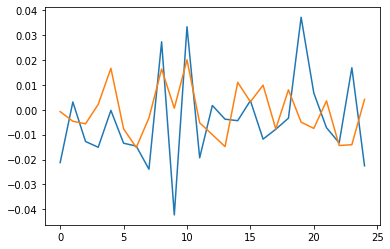

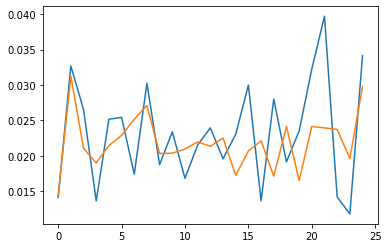

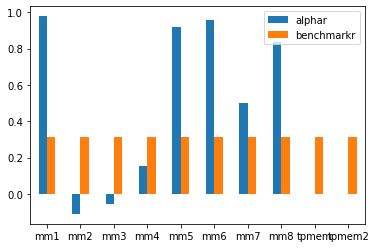

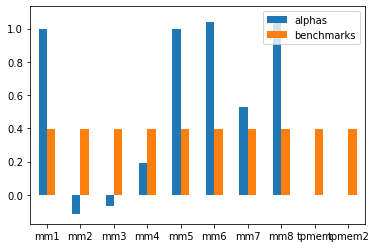

In [98]:
sig=get_signalact2(kalpha80(ohlcv_data),logrets(ohlcv_data), delay=1)

In [101]:
# ((rank(Log(product(rank((rank(correlation(vwap, sum(adv10, 49.6054), 8.47743))^4)), 14.9655))) 
# < rank(correlation(rank(vwap), rank(volume), 5.07914))) * -1)

def kalpha81(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            k=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            g=ohlcv_data[i]['Volume'].rolling(window=10).mean()
            gy=g.rolling(window=50).sum()
            aq=ts_rank(np.log1p((ts_rank(ts_rank(corr(k,gy, 8), 10)**4, 10)).rolling(window=15).apply(np.prod)), 10)
            bq=ts_rank(corr(ts_rank(k,10), ts_rank(ohlcv_data[i]['Volume'],10),5),10)
            cq=(aq<bq)*(-1)
            dq=np.nan_to_num(cq,0)
            kalpha.append(np.asarray(dq))
    return getleneq(kalpha)[1]

kalpha81(ohlcv_data)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


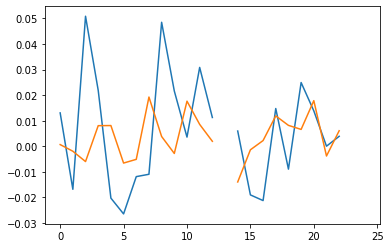

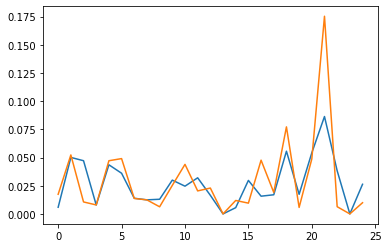

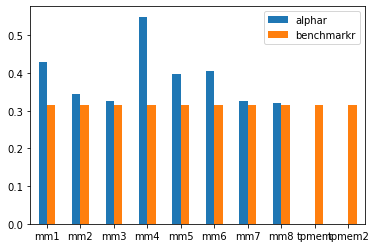

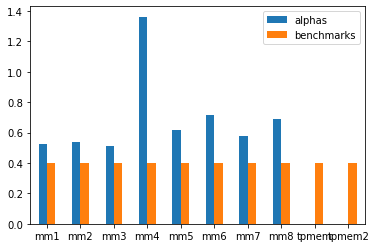

In [102]:
sig=get_signalact2(kalpha81(ohlcv_data),logrets(ohlcv_data), delay=1)

In [103]:
# (min(rank(decay_linear(delta(open, 1.46063), 14.8717)), 
# Ts_Rank(decay_linear(correlation(IndNeutralize(volume, IndClass.sector), ((open * 0.634196) + 
# (open * (1 - 0.634196))), 17.4842), 6.92131), 13.4283)) * -1)

def kalpha82(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.634196
            gy=ts_rank(ta.WMA(ohlcv_data[i]['Open']-ohlcv_data[i]['Open'].shift(2),15),10)
            ab=ts_rank(ta.WMA(corr((ohlcv_data[i]['Volume']-ohlcv_data[i]['Volume'].rolling(window=5).min()),(ohlcv_data[i]['Open']*(w)+ohlcv_data[i]['Open']*(1-w)),17),7),14)
            ap=(np.minimum(gy,ab))*(-1)
            kalpha.append(np.asarray(ap))
    return getleneq(kalpha)[1]

kalpha82(ohlcv_data)

array([[nan, nan, nan, ..., -1., -3., -6.],
       [nan, nan, nan, ..., -1., -2., -3.],
       [nan, nan, nan, ..., -1., -3., -6.],
       ...,
       [nan, nan, nan, ..., -1., -3., -5.],
       [nan, nan, nan, ..., -1., -2., -4.],
       [nan, nan, nan, ..., -1., -2., -5.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


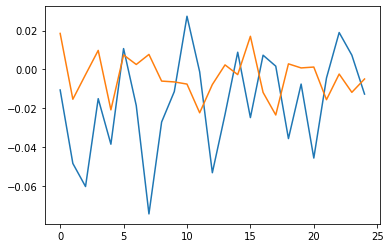

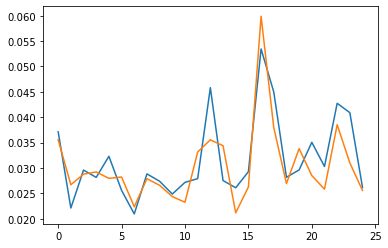

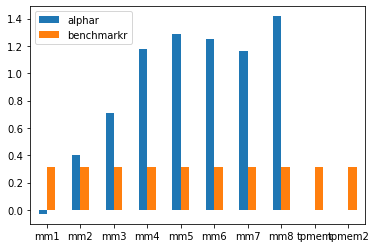

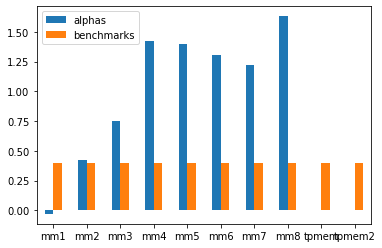

In [104]:
sig=get_signalact2(kalpha82(ohlcv_data),logrets(ohlcv_data), delay=1)

In [105]:
# ((rank(delay(((high - low) / (sum(close, 5) / 5)), 2)) * rank(rank(volume))) / 
# (((high - low) / (sum(close, 5) / 5)) / (vwap - close)))


def kalpha83(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            af=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bf=(ts_rank((((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])/((ohlcv_data[i]['Close'].rolling(window=5).sum())/5)).shift(2)),10))*(ts_rank(ohlcv_data[i]['Volume'],10))
            cf=((ohlcv_data[i]['High']-ohlcv_data[i]['Low'])/((ohlcv_data[i]['Close'].rolling(window=5).sum())/5))/(af-ohlcv_data[i]['Close'])
            df=bf/cf
            ef=np.nan_to_num(df, 0)
            kalpha.append(np.asarray(ef))
    return getleneq(kalpha)[1]

kalpha83(ohlcv_data)

array([[     0.        ,      0.        ,      0.        , ...,
          6853.21773643,   4590.34176928,    210.63098463],
       [     0.        ,      0.        ,      0.        , ...,
         17354.70735244,  25850.85269666,    430.15998112],
       [     0.        ,      0.        ,      0.        , ...,
         -7715.27021812, -19142.48794017,  -2558.60451568],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
        -11905.13651202, -13929.91172879,  -3401.08946656],
       [     0.        ,      0.        ,      0.        , ...,
         -3730.0824991 , -19048.77266665,   -338.42007314],
       [     0.        ,      0.        ,      0.        , ...,
          -251.27596625,  -9065.85073283,  -1520.48494712]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


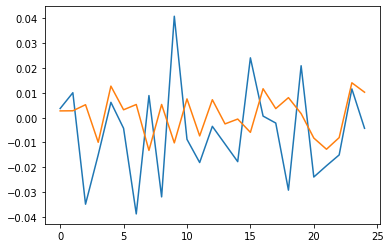

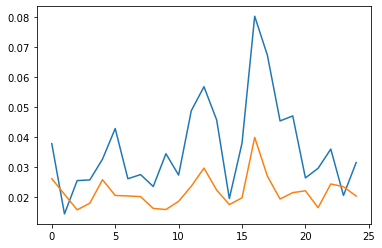

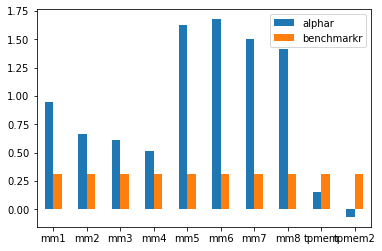

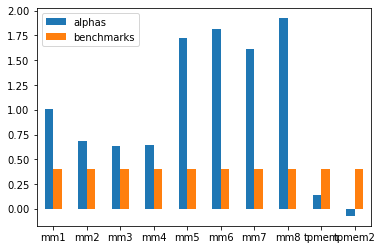

In [106]:
sig=get_signalact2(kalpha83(ohlcv_data),logrets(ohlcv_data), delay=1)

In [107]:
# SignedPower(Ts_Rank((vwap - ts_max(vwap, 15.3217)), 20.7127), delta(close, 4.96796)) 


def kalpha84(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ag=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bg=ts_rank((ag-ag.rolling(window=15).max()),20)
            cg=ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].shift(5)
            dg=bg**cg
            eg=np.nan_to_num(dg)
            kalpha.append(np.asarray(eg))
    return getleneq(kalpha)[1]

kalpha84(ohlcv_data)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 2.67314694e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.48554246e-02, 1.81746320e-01, 1.54068546e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.39751010e-04, 9.54060129e-01, 3.01967510e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.56049171e-01, 7.72091113e-01, 1.23568334e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.12240690e-07, 5.79199124e-04, 7.68021569e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.66669827e-05, 8.87516158e-02, 5.17683529e-01]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


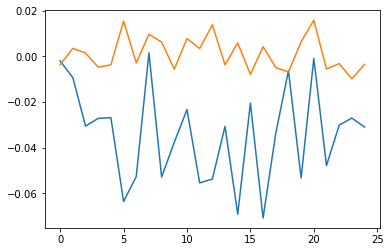

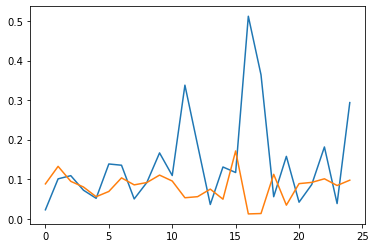

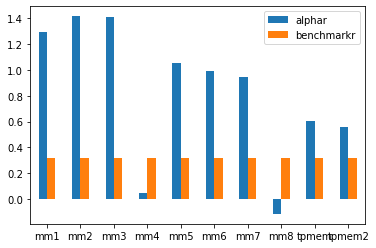

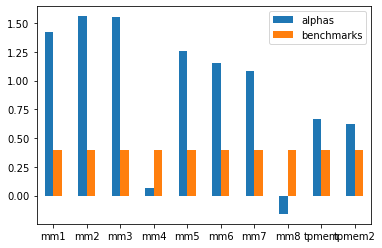

In [108]:
sig=get_signalact2(kalpha84(ohlcv_data),logrets(ohlcv_data), delay=1)

In [109]:
# (rank(correlation(((high * 0.876703) + (close * (1 - 0.876703))), adv30, 9.61331))
# ^rank(correlation(Ts_Rank(((high + low) / 2), 3.70596), Ts_Rank(volume, 10.1595), 7.11408))) 


def kalpha85(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.876703
            ah=ts_rank(corr((ohlcv_data[i]['High']*(w)+(ohlcv_data[i]['Close']*(1-w))), ohlcv_data[i]['Volume'].rolling(window=30).mean(),10),10)
            bh=ts_rank(corr(ts_rank(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2),4), ts_rank(ohlcv_data[i]['Volume'],10),7),10)
            ch=ah**bh
            dh=np.nan_to_num(ch,0)
            kalpha.append(np.asarray(dh))
    return getleneq(kalpha)[1]
        
    
kalpha85(ohlcv_data)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.9049000e+04, 3.9062500e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.7648010e+06,
        6.0466176e+07, 6.5536000e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+02,
        1.0000000e+10, 2.0971520e+06],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.6000000e+01,
        6.5610000e+03, 4.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+07,
        1.0000000e+10, 1.0000000e+09],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 4.0000000e+00]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


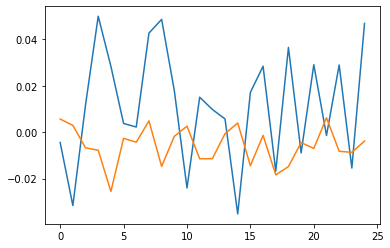

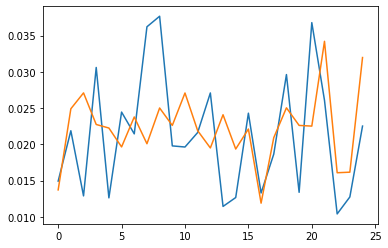

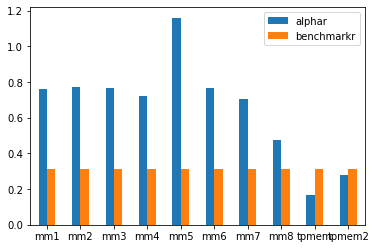

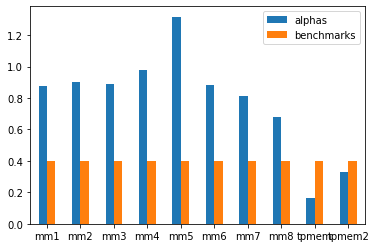

In [110]:
sig=get_signalact2(kalpha85(ohlcv_data),logrets(ohlcv_data), delay=1)

In [111]:
# ((Ts_Rank(correlation(close, sum(adv20, 14.7444), 6.00049), 20.4195) 
#   < rank(((open + close) - (vwap + open)))) * -1) 

def kalpha86(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            au=ohlcv_data[i]['Volume'].rolling(window=20).mean()
            bu=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            cu=ts_rank(corr(ohlcv_data[i]['Close'], au.rolling(window=15).sum(),6),20)
            du=ts_rank(((ohlcv_data[i]['Open']+ohlcv_data[i]['Close'])-(ohlcv_data[i]['Open']+bu)),10)
            eu=(cu<du)*(-1)
            fu=np.nan_to_num(eu,0)
            kalpha.append(np.asarray(fu))
    return getleneq(kalpha)[1]
    
kalpha86(ohlcv_data)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


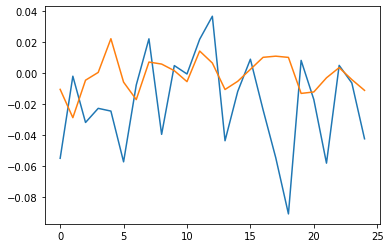

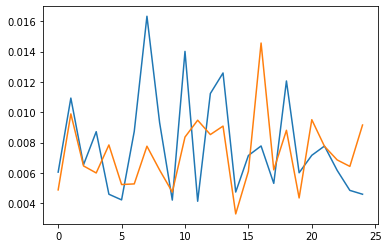

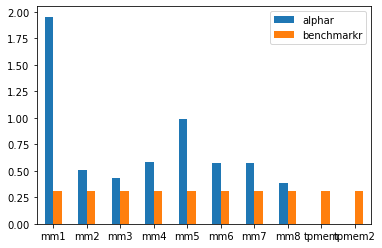

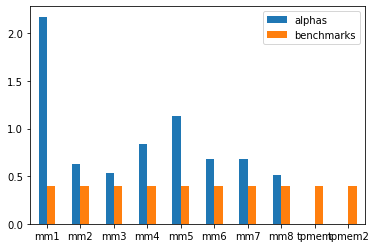

In [112]:
sig=get_signalact2(kalpha86(ohlcv_data),logrets(ohlcv_data), delay=1)

In [113]:
# (max(rank(decay_linear(delta(((close * 0.369701) + (vwap * (1 - 0.369701))), 1.91233), 2.65461))
# ,Ts_Rank(decay_linear(abs(correlation(IndNeutralize(adv81, IndClass.industry), close, 13.4132)), 4.89768), 14.4535)) * -1)

def kalpha87(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.369701
            av=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bv=ohlcv_data[i]['Volume'].rolling(window=81).mean()
            cv=ts_rank(ta.WMA((ohlcv_data[i]['Close']*(w)+av*(1-w))-((ohlcv_data[i]['Close']*(w)+av*(1-w)).shift(2)),3),10)
            dv=ts_rank(ta.WMA(abs(corr(bv-bv.rolling(window=5).min(), ohlcv_data[i]['Close'],14)),5),15)
            ev=(np.maximum(cv,dv))*(-1)
            fv=np.nan_to_num(ev)
            kalpha.append(np.asarray(fv))
    return getleneq(kalpha)[1]

kalpha87(ohlcv_data)

array([[  0.,   0.,   0., ...,  -5.,  -7., -10.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., -12., -13., -14.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


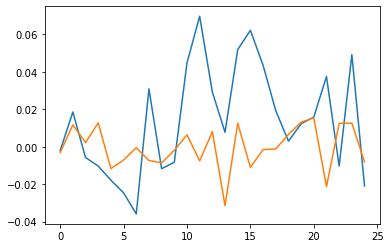

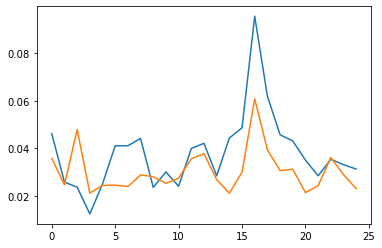

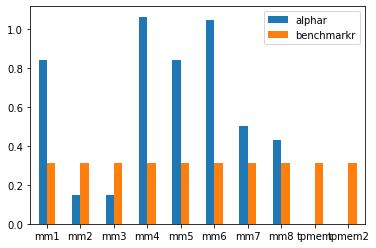

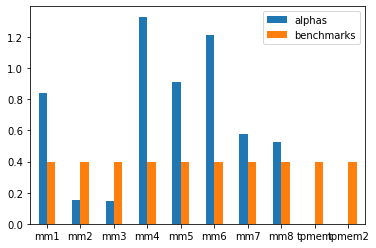

In [114]:
sig=get_signalact2(kalpha87(ohlcv_data),logrets(ohlcv_data), delay=1)

In [115]:
# min(rank(decay_linear(((rank(open) + rank(low)) - (rank(high) + rank(close))), 8.06882)),
# Ts_Rank(decay_linear(correlation(Ts_Rank(close, 8.44728), Ts_Rank(adv60, 20.6966), 8.01266), 6.65053), 2.61957))


def kalpha88(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ax=ts_rank(ta.WMA(((ts_rank(ohlcv_data[i]['Open'],10)+ts_rank(ohlcv_data[i]['Low'],10))-(ts_rank(ohlcv_data[i]['High'],10)+ts_rank(ohlcv_data[i]['Close'],10))),8),10)
            bx=ts_rank(ta.WMA(corr(ts_rank(ohlcv_data[i]['Close'],8),ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(),20),8),7),3)
            out=np.minimum(ax, bx)
            cx=np.nan_to_num(out,0)
            kalpha.append(np.asarray(cx))
    return getleneq(kalpha)[1]

kalpha88(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
kalpha88(ohlcv_data)[5:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


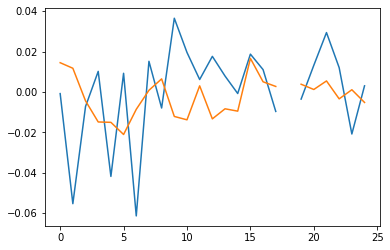

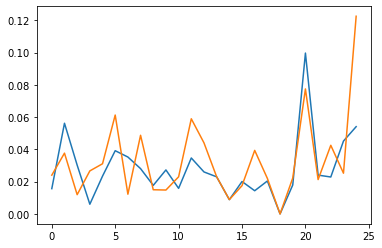

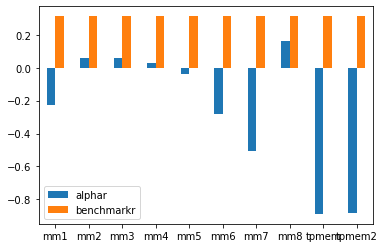

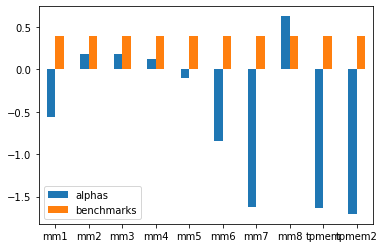

In [117]:
sig=get_signalact2(kalpha88(ohlcv_data),logrets(ohlcv_data), delay=1)

In [118]:
# (Ts_Rank(decay_linear(correlation(((low * 0.967285) + (low * (1 - 0.967285))), adv10, 6.94279), 5.51607), 3.79744)
#  - Ts_Rank(decay_linear(delta(IndNeutralize(vwap, IndClass.industry), 3.48158), 10.1466), 15.3012)) 


def kalpha89(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.967285
            ay=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            by=ts_rank(ta.WMA(corr((ohlcv_data[i]['Low']*(w)+(ohlcv_data[i]['Low']*(1-w))), ohlcv_data[i]['Volume'].rolling(window=10).mean(),7),5),3)
            cy=ts_rank(ta.WMA((ay-ay.rolling(window=5).min())-((ay-ay.rolling(window=5).min()).shift(3)),10),15)
            dy=by-cy
            ey=np.nan_to_num(dy,0)
            kalpha.append(np.asarray(ey))
    return getleneq(kalpha)[1]
        
kalpha89(ohlcv_data)    

array([[  0.,   0.,   0., ...,  -5.,  -5.,  -5.],
       [  0.,   0.,   0., ...,  -7.,  -7.,  -7.],
       [  0.,   0.,   0., ...,  -2.,  -2.,  -2.],
       ...,
       [  0.,   0.,   0., ...,  -9., -11., -10.],
       [  0.,   0.,   0., ...,   1.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


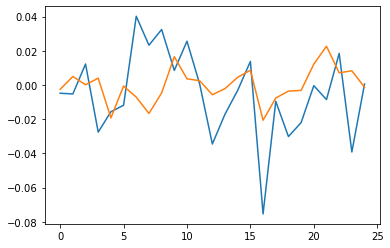

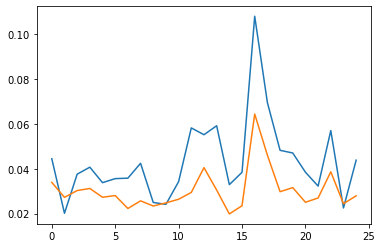

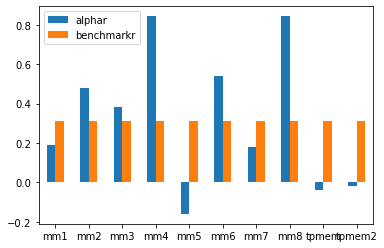

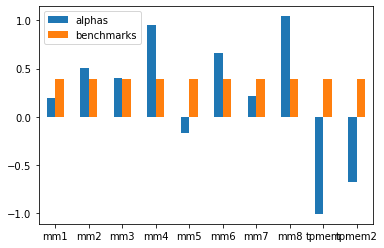

In [119]:
sig=get_signalact2(kalpha89(ohlcv_data),logrets(ohlcv_data), delay=1)

In [120]:
# ((rank((close - ts_max(close, 4.66719)))
#   ^Ts_Rank(correlation(IndNeutralize(adv40, IndClass.subindustry), low, 5.38375), 3.21856)) * -1) 


def kalpha90(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            az=ts_rank((ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].rolling(window=4).max()),10)
            aa=ohlcv_data[i]['Volume'].rolling(window=40).mean()
            bz=ts_rank(corr((aa-aa.rolling(window=5).min()),ohlcv_data[i]['Low'],5),3)
            cz=(az**bz)*(-1)
            dz=np.nan_to_num(cz)
            kalpha.append(np.asarray(dz))
    return getleneq(kalpha)[1]
        
kalpha90(ohlcv_data)       

array([[   0.   ,    0.   ,    0.   , ...,   -6.   , -729.   , -729.   ],
       [   0.   ,    0.   ,    0.   , ...,   -1.   , -343.   , -857.375],
       [   0.   ,    0.   ,    0.   , ...,    0.   , -857.375,  -81.   ],
       ...,
       [   0.   ,    0.   ,    0.   , ...,   -4.   , -857.375,  -81.   ],
       [   0.   ,    0.   ,    0.   , ...,   -1.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   , -729.   ,  -81.   ]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


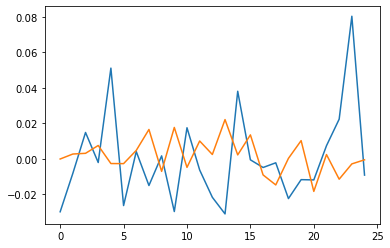

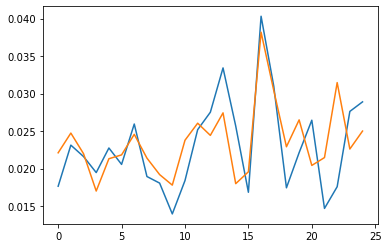

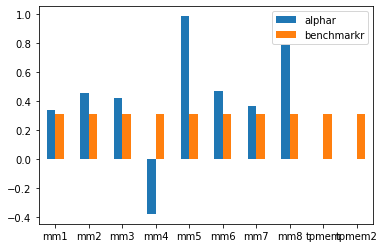

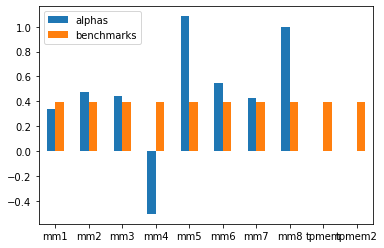

In [121]:
sig=get_signalact2(kalpha90(ohlcv_data),logrets(ohlcv_data), delay=1)

In [122]:
# ((Ts_Rank(decay_linear(decay_linear(correlation(IndNeutralize(close, IndClass.industry), volume, 9.74928), 16.398), 3.83219), 4.8667) 
# - rank(decay_linear(correlation(vwap, adv30, 4.01303), 2.6809))) * -1) 

def kalpha91(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            sw=ta.WMA(corr((ohlcv_data[i]['Close']-ohlcv_data[i]['Close'].rolling(window=5).min()), ohlcv_data[i]['Volume'],9),16)
            gw=sw.fillna(0)
            aw=ts_rank((ta.WMA(gw,4)),5)
            bw=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            cw=ts_rank(ta.WMA(corr(bw, ohlcv_data[i]['Volume'].rolling(window=30).mean(),4),2),10)
            dw=(aw-cw)*(-1)
            ew=np.nan_to_num(dw,0)
            kalpha.append(np.asarray(ew))
    return getleneq(kalpha)[1]

kalpha91(ohlcv_data)

array([[ 0.,  0.,  0., ...,  1., -0.,  2.],
       [ 0.,  0.,  0., ..., -0., -0.,  3.],
       [ 0.,  0.,  0., ...,  9.,  9.,  8.],
       ...,
       [ 0.,  0.,  0., ...,  8.,  5.,  2.],
       [ 0.,  0.,  0., ...,  9.,  7.,  3.],
       [ 0.,  0.,  0., ...,  5.,  4., -0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


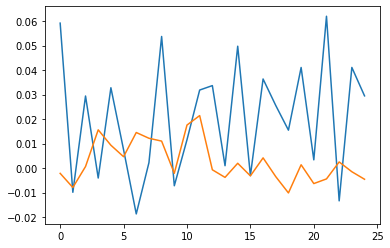

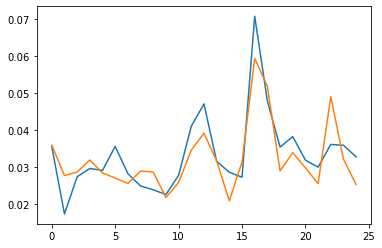

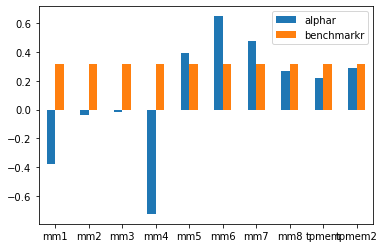

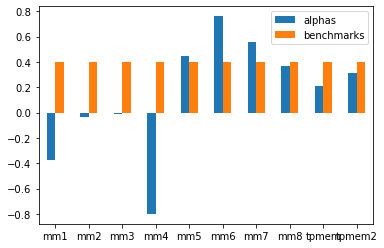

In [123]:
sig=get_signalact2(kalpha91(ohlcv_data),logrets(ohlcv_data), delay=1)

In [124]:
# min(Ts_Rank(decay_linear(((((high + low) / 2) + close) < (low + open)), 14.7221), 18.8683), 
# Ts_Rank(decay_linear(correlation(rank(low), rank(adv30), 7.58555), 6.94024), 6.80584))
    

    
def kalpha92(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ai=ts_rank(ta.WMA(((((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2)+(ohlcv_data[i]['Close']))<(ohlcv_data[i]['Low']+ohlcv_data[i]['Open'])),14),18)
            bi=ts_rank(ta.WMA(corr(ts_rank(ohlcv_data[i]['Low'],10),ts_rank(ohlcv_data[i]['Volume'].rolling(window=30).mean(),10),7),7),7)
            ci=np.minimum(ai, bi)
            di=np.nan_to_num(ci,0)
            kalpha.append(np.asarray(di))
    return getleneq(kalpha)[1]
        
kalpha92(ohlcv_data)   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
kalpha92(ohlcv_data)[10:20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
unique_elements, counts_elements = np.unique(kalpha92(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([0. , 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. ]), array([24558,   235,     7,    58,     8,    56,     5,    33,     7,
          42,     8,    38,     4,   116], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib

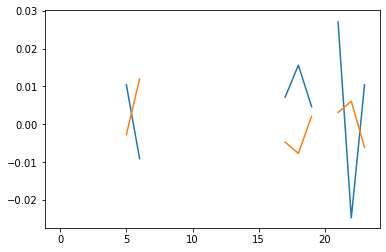

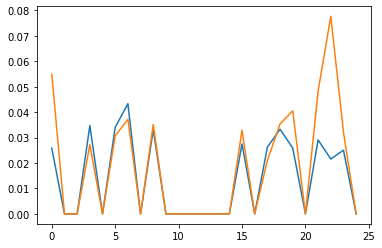

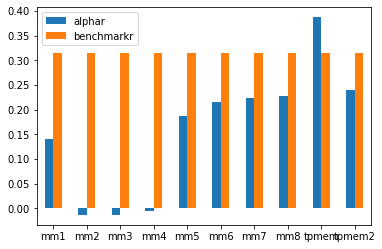

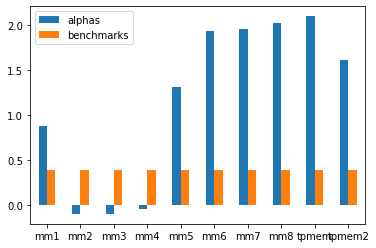

In [127]:
sig=get_signalact2(kalpha92(ohlcv_data),logrets(ohlcv_data), delay=1)

In [128]:
# (Ts_Rank(decay_linear(correlation(IndNeutralize(vwap, IndClass.industry), adv81, 17.4193), 19.848), 7.54455)
#  / rank(decay_linear(delta(((close * 0.524434) + (vwap * (1 - 0.524434))), 2.77377), 16.2664))) 

def kalpha93(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.524434
            ak=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bk=ts_rank(ta.WMA(corr((ak-ak.rolling(window=5).min()), ohlcv_data[i]['Volume'].rolling(window=81).mean(),17),18),7)
            ck=ts_rank(ta.WMA((ohlcv_data[i]['Close']*(w)+(ak*(1-w)))-((ohlcv_data[i]['Close']*(w)+(ak*(1-w))).shift(2)),16),10)
            dk=bk/ck
            ek=np.nan_to_num(dk)
            kalpha.append(np.asarray(dk))
    return getleneq(kalpha)[1]
        
kalpha93(ohlcv_data)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


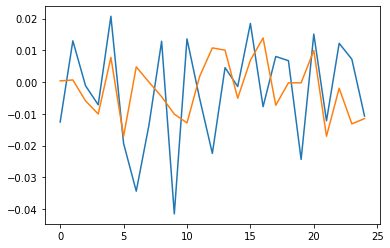

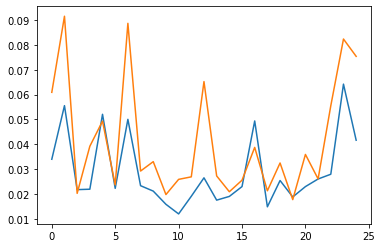

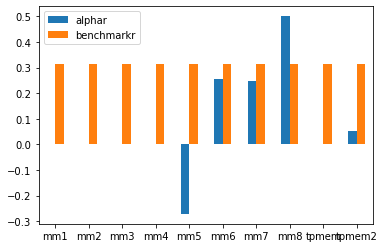

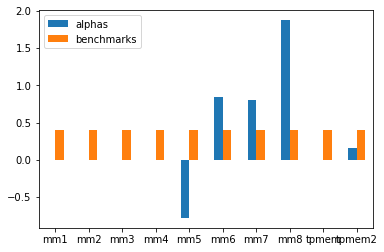

In [129]:
sig=get_signalact2(kalpha93(ohlcv_data),logrets(ohlcv_data), delay=1)

In [130]:
# ((rank((vwap - ts_min(vwap, 11.5783)))
# ^Ts_Rank(correlation(Ts_Rank(vwap, 19.6462), Ts_Rank(adv60, 4.02992), 18.0926), 2.70756)) * -1) 


def kalpha94(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ap=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bp=ts_rank((ap-ap.rolling(window=11).min()),10)
            cp=ts_rank(corr(ts_rank(ap,20), ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(),4), 18),3)
            dp=(bp**cp)*(-1)
            ep=np.nan_to_num(dp,0)
            kalpha.append(np.asarray(ep))
    return getleneq(kalpha)[1]

kalpha94(ohlcv_data)

array([[  0.  ,   0.  ,   0.  , ..., -30.25, -30.25, -30.25],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,  -1.  ,   0.  ,  -1.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,  -1.  ],
       [  0.  ,   0.  ,   0.  , ...,  -1.  ,  -1.  ,  -1.  ],
       [  0.  ,   0.  ,   0.  , ...,  -1.  ,  -1.  ,  -1.  ]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


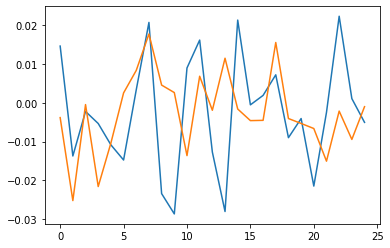

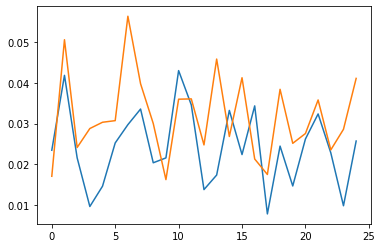

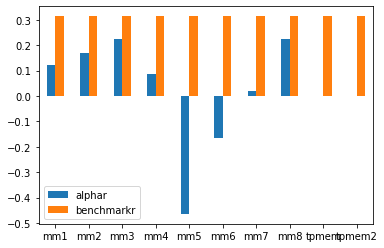

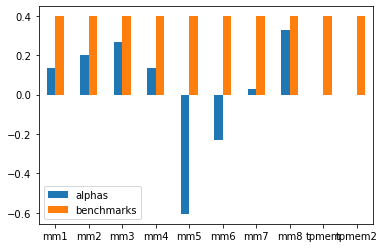

In [131]:
sig=get_signalact2(kalpha94(ohlcv_data),logrets(ohlcv_data), delay=1)

In [132]:
# (rank((open - ts_min(open, 12.4105))) 
#  < Ts_Rank((rank(correlation(sum(((high + low) / 2), 19.1351), sum(adv40, 19.1351), 12.8742))^5), 11.7584)) 

def kalpha95(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            an=ts_rank((ohlcv_data[i]['Open']-ohlcv_data[i]['Open'].rolling(window=12).min()),10)
            bn=ohlcv_data[i]['Volume'].rolling(window=40).mean()
            cn=ts_rank((ts_rank(corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2).rolling(window=19).sum(), bn.rolling(window=19).sum(),12),10)*5),11)
            dn=an<cn
            en=np.nan_to_num(dn, 0)
            kalpha.append(np.asarray(en))
    return getleneq(kalpha)[1]

kalpha95(ohlcv_data)

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6

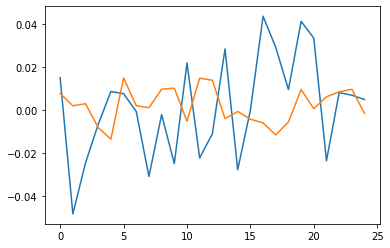

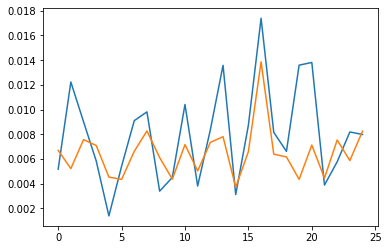

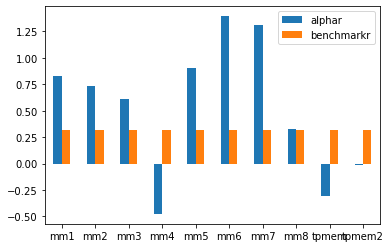

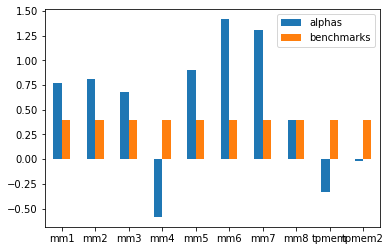

In [133]:
sig=get_signalact2(kalpha95(ohlcv_data),logrets(ohlcv_data), delay=1)

In [134]:
# (max(Ts_Rank(decay_linear(correlation(rank(vwap), rank(volume), 3.83878), 4.16783), 8.38151),
# Ts_Rank(decay_linear(Ts_ArgMax(correlation(Ts_Rank(close, 7.45404), Ts_Rank(adv60, 4.13242), 3.65459), 12.6556), 14.0365), 13.4143)) * -1) 


def kalpha96(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ac=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bc=ts_rank(ta.WMA(corr(ts_rank(ac,10), ts_rank(ohlcv_data[i]['Volume'],10),4),4),8)
            cc=ts_rank(ta.WMA((corr(ts_rank(ohlcv_data[i]['Close'],7), ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(),4),4).rolling(window=12).apply(np.argmax).add(1)).fillna(0),14),13)
            dc=(np.maximum(bc,cc))*(-1)
            ec=np.nan_to_num(dc,0)
            kalpha.append(np.asarray(ec))
    return getleneq(kalpha)[1]

kalpha96(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
unique_elements, counts_elements = np.unique(kalpha96(ohlcv_data), return_counts=True)

print((unique_elements, counts_elements))

(array([-8., -7., -4., -2.,  0.]), array([    8,    17,     1,     1, 25148], dtype=int64))


1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib

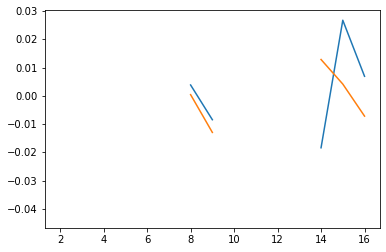

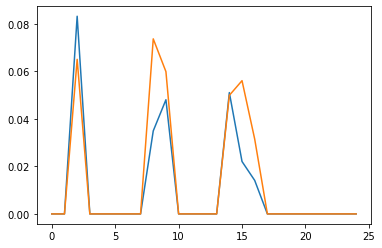

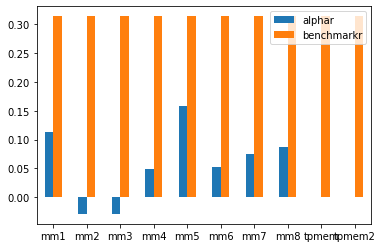

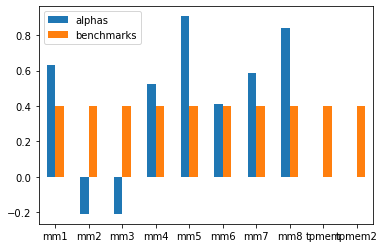

In [136]:
sig=get_signalact2(kalpha96(ohlcv_data),logrets(ohlcv_data), delay=1)

In [137]:
# ((rank(decay_linear(delta(IndNeutralize(((low * 0.721001) + (vwap * (1 - 0.721001))), IndClass.industry), 3.3705), 20.4523))
# -Ts_Rank(decay_linear(Ts_Rank(correlation(Ts_Rank(low, 7.87871), Ts_Rank(adv60, 17.255), 4.97547), 18.5925), 15.7152), 6.71659)) * -1)

def kalpha97(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            w=0.721001
            am=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bm=ts_rank(ta.WMA((((ohlcv_data[i]['Low']*(w)+(am*(1-w)))-((ohlcv_data[i]['Low']*(w)+(am*(1-w))).rolling(window=5).min()))-(((ohlcv_data[i]['Low']*(w)+(am*(1-w)))-((ohlcv_data[i]['Low']*(w)+(am*(1-w))).rolling(window=5).min())).shift(3))),20),10)      
            cm=ts_rank(ta.WMA(ts_rank(corr(ts_rank(ohlcv_data[i]['Low'],7), ts_rank(ohlcv_data[i]['Volume'].rolling(window=60).mean(),17),5),18),15),6)
            dm=bm-cm
            em=np.nan_to_num(dm,0)
            kalpha.append(np.asarray(em))
    return getleneq(kalpha)[1]

kalpha97(ohlcv_data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
kalpha97(ohlcv_data)[5:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\numpy\lib

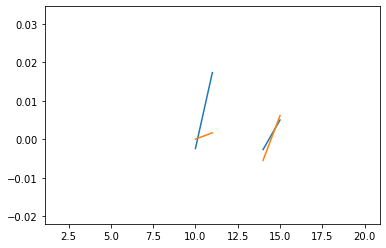

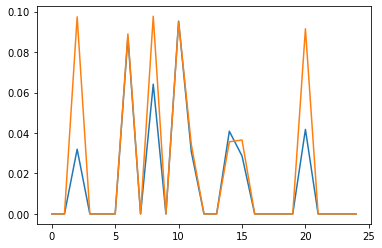

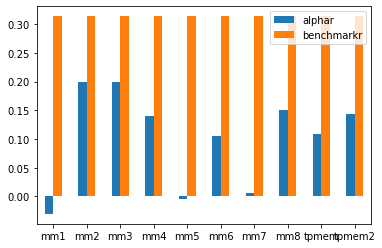

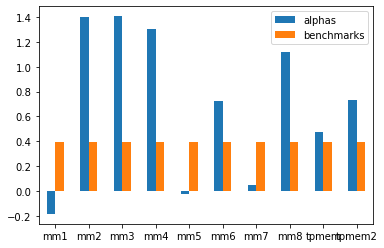

In [139]:
sig=get_signalact2(kalpha97(ohlcv_data),logrets(ohlcv_data), delay=1)

In [140]:
# (rank(decay_linear(correlation(vwap, sum(adv5, 26.4719), 4.58418), 7.18088)) - 
# rank(decay_linear(Ts_Rank(Ts_ArgMin(correlation(rank(open), rank(adv15), 20.8187), 8.62571), 6.95668), 8.07206))) 


def kalpha98(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            ad=(((ohlcv_data[i]['High']+ohlcv_data[i]['Low']+ohlcv_data[i]['Close'])/3)*(ohlcv_data[i]['Volume'])).cumsum()/ohlcv_data[i]['Volume'].cumsum()
            bd=ohlcv_data[i]['Volume'].rolling(window=5).mean()
            cd=ts_rank(ta.WMA(corr(ad, bd.rolling(window=26).sum(),4),7),10)
            dd=ts_rank(ta.WMA(ts_rank(((corr(ts_rank(ohlcv_data[i]['Open'],10),ts_rank((ohlcv_data[i]['Volume'].rolling(window=15).mean()),10),21).rolling(window=8).apply(np.argmin).add(1)).fillna(0)),7),8),10)
            ed=cd-dd
            fd=np.nan_to_num(ed,0)
            kalpha.append(np.asarray(fd))
    return getleneq(kalpha)[1]

kalpha98(ohlcv_data)

array([[ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ..., -7., -4., -1.],
       [ 0.,  0.,  0., ...,  4.,  7.,  9.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  4.,  9.],
       [ 0.,  0.,  0., ..., -5.,  3.,  7.],
       [ 0.,  0.,  0., ...,  4.,  6.,  8.]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


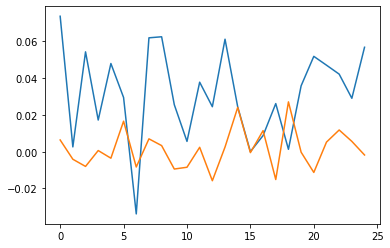

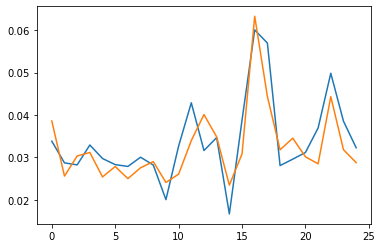

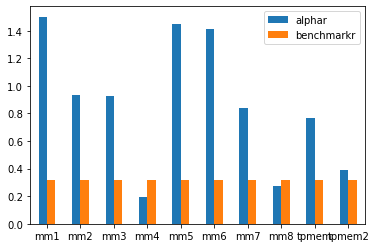

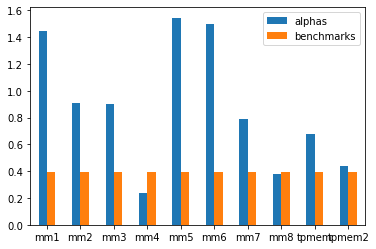

In [141]:
sig=get_signalact2(kalpha98(ohlcv_data),logrets(ohlcv_data), delay=1)

In [142]:
# ((rank(correlation(sum(((high + low) / 2), 19.8975), sum(adv60, 19.8975), 8.8136)) < 
# rank(correlation(low, volume, 6.28259))) * -1) 


def kalpha99(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            be=ohlcv_data[i]['Volume'].rolling(window=60).mean()
            ae=ts_rank(corr(((ohlcv_data[i]['High']+ohlcv_data[i]['Low'])/2).rolling(window=20).sum(),be.rolling(window=20).sum(),9),10)
            ce=ts_rank(corr(ohlcv_data[i]['Low'],ohlcv_data[i]['Volume'],6),10)
            de=(ae<ce)*(-1)
            ee=np.nan_to_num(de,0)
            kalpha.append(np.asarray(ee))
    return getleneq(kalpha)[1]
  
kalpha99(ohlcv_data)

array([[ 0,  0,  0, ..., -1, -1,  0],
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ..., -1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, -1,  0],
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


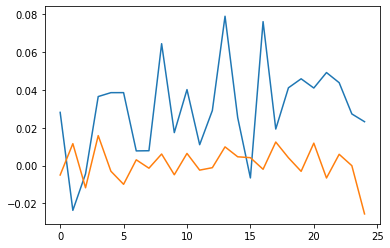

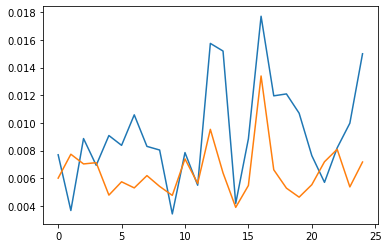

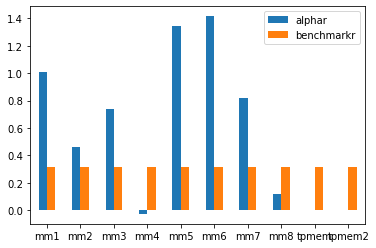

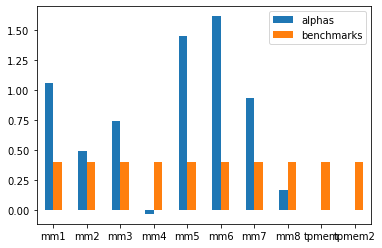

In [143]:
sig=get_signalact2(kalpha99(ohlcv_data),logrets(ohlcv_data), delay=1)

In [144]:
# (0 - (1 * (((1.5 * scale(indneutralize(indneutralize(rank(((((close - low) - (high - 
# close)) / (high - low)) * volume)), IndClass.subindustry), IndClass.subindustry))) - 
# scale(indneutralize((correlation(close, rank(adv20), 5) - rank(ts_argmin(close, 30))), 
# IndClass.subindustry)))* (volume / adv20)))) 


def kalpha100(ohlcv_data):
    kalpha=[]
    for i in range(len(ohlcv_data)):
        if len(ohlcv_data[i])>0:
            aq=ts_rank(((((ohlcv_data[i]['Close']-ohlcv_data[i]['Low'])-(ohlcv_data[i]['High']-ohlcv_data[i]['Close']))/(ohlcv_data[i]['High']-ohlcv_data[i]['Low']))*(ohlcv_data[i]['Volume'])),10)
            bq=scale(aq-aq.rolling(window=5).min())*(1.5)
            cq=corr(ohlcv_data[i]['Close'], ts_rank(ohlcv_data[i]['Volume'].rolling(window=20).mean(),10),5)-ts_rank((ohlcv_data[i]['Close'].rolling(window=30).apply(np.argmin).add(1)).fillna(0),10)
            dq=scale(cq-cq.rolling(window=5).min())
            eq=bq-dq
            fq=ohlcv_data[i]['Volume']/(ohlcv_data[i]['Volume'].rolling(window=20).mean())
            gq=(eq*fq)*(-1)
            hq=np.nan_to_num(gq,0)
            kalpha.append(np.asarray(hq))
    return getleneq(kalpha)[1]

kalpha100(ohlcv_data)

array([[ 0.        ,  0.        ,  0.        , ..., -0.0007698 ,
        -0.00077693,  0.00018471],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00135352,
         0.00042674,  0.00068838],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00117584,
        -0.00243103,  0.00058461]])

1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25


c:\users\neha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25
1007
25


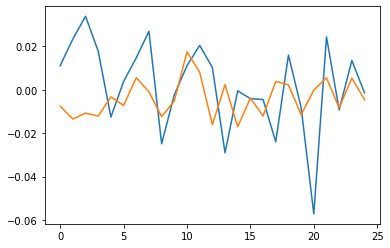

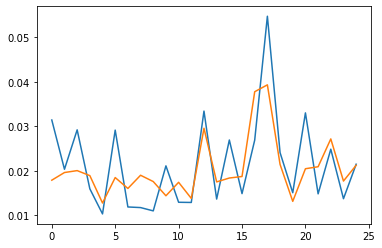

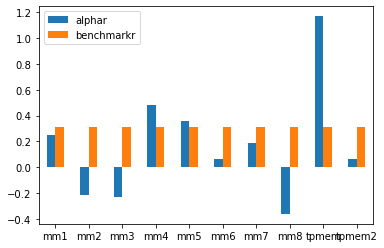

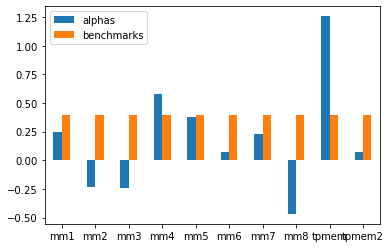

In [145]:
sig=get_signalact2(kalpha100(ohlcv_data),logrets(ohlcv_data), delay=1)